# **EyeDisease 판독기**

## **1. 필요한 모듈 다운로드 및 import**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import nltk
import torchtext
import numpy as np
import torch
import torch.optim as optim
import torch.backends.cudnn as cudnn
import os
import copy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [0]:
pip install konlpy

     |████████████████████████████████| 19.4MB 9.2MB/s 
     |████████████████████████████████| 2.7MB 48.6MB/s 


In [0]:
from konlpy.tag import Komoran, Kkma, Okt

## **2. input data 불러오기**

In [0]:
# 2-1.경로

data = pd.read_csv('/content/drive/My Drive/STH/Data/last1.csv',encoding='utf-8',error_bad_lines=False,engine='python') #utf-8 #latin1 #CP949
data[:8]

disease                                           symptoms
0    안구건조증  눈이 뻑뻑 건조함 피로함 시림 건조안 눈물이 부족 눈물이 지나치게 증발한다 눈이 따...
1      녹내장  심한 안통 시력 저하 눈물 흘림 눈부심 안검연축 눈이 당김 각막 확장 각막 혼탁 시...
2      백내장  시력감퇴 눈 부심 빛이 퍼져보임 물체가 여러 개로 보임 사물의 색 왜곡 눈동자 뿌옇...
3      결막염  가려움 간지러움 눈의 발적 분비물 발생 눈꼽이 생김 눈꼽 발생 이물감 눈 통증 안통...
4      다래끼  눈꺼풀 부종 충혈 안통 간지러움 까끌까끌함 이물감 눈에 아몬드가 있는 듯함 눈 통증...
5  당뇨 망막병증  시야 흐림 광시증 눈을 감아도 빛이 보임 비문증 눈 앞에뭐가 떠다님 야간 시력 저하...
6     황반변성  시력 감퇴 시력 저하 눈이 잘 보이지 않음 시력이 나빠짐 변시증 사물이 일그러져 보...
7       노안  독서를 하거나 얼굴을 가까이 대고 작업한 후 눈의 피로나 두통이 발생함 작은 글씨를...

In [0]:
# 2-2. 질병 label& 질병명을 숫자로 변경 해주기. --질병에 변동사항있을 때 늘릴때 변경하기
 

data['disease'] = data['disease'].replace(['안구건조증','녹내장','백내장','결막염','다래끼','당뇨 망막병증','황반변성','노안'],[0,1,2,3,4,5,6,7])
data[:]

disease                                           symptoms
0        0  눈이 뻑뻑 건조함 피로함 시림 건조안 눈물이 부족 눈물이 지나치게 증발한다 눈이 따...
1        1  심한 안통 시력 저하 눈물 흘림 눈부심 안검연축 눈이 당김 각막 확장 각막 혼탁 시...
2        2  시력감퇴 눈 부심 빛이 퍼져보임 물체가 여러 개로 보임 사물의 색 왜곡 눈동자 뿌옇...
3        3  가려움 간지러움 눈의 발적 분비물 발생 눈꼽이 생김 눈꼽 발생 이물감 눈 통증 안통...
4        4  눈꺼풀 부종 충혈 안통 간지러움 까끌까끌함 이물감 눈에 아몬드가 있는 듯함 눈 통증...
5        5  시야 흐림 광시증 눈을 감아도 빛이 보임 비문증 눈 앞에뭐가 떠다님 야간 시력 저하...
6        6  시력 감퇴 시력 저하 눈이 잘 보이지 않음 시력이 나빠짐 변시증 사물이 일그러져 보...
7        7  독서를 하거나 얼굴을 가까이 대고 작업한 후 눈의 피로나 두통이 발생함 작은 글씨를...

In [0]:
X_data = data['disease']  #input, label 분리 
Y_data = data['symptoms'] # 나중에 x: 증상, y: 질병 으로 변경할 것 임. 

print(Y_data) # 증상 출력

0    눈이 뻑뻑 건조함 피로함 시림 건조안 눈물이 부족 눈물이 지나치게 증발한다 눈이 따...
1    심한 안통 시력 저하 눈물 흘림 눈부심 안검연축 눈이 당김 각막 확장 각막 혼탁 시...
2    시력감퇴 눈 부심 빛이 퍼져보임 물체가 여러 개로 보임 사물의 색 왜곡 눈동자 뿌옇...
3    가려움 간지러움 눈의 발적 분비물 발생 눈꼽이 생김 눈꼽 발생 이물감 눈 통증 안통...
4    눈꺼풀 부종 충혈 안통 간지러움 까끌까끌함 이물감 눈에 아몬드가 있는 듯함 눈 통증...
5    시야 흐림 광시증 눈을 감아도 빛이 보임 비문증 눈 앞에뭐가 떠다님 야간 시력 저하...
6    시력 감퇴 시력 저하 눈이 잘 보이지 않음 시력이 나빠짐 변시증 사물이 일그러져 보...
7    독서를 하거나 얼굴을 가까이 대고 작업한 후 눈의 피로나 두통이 발생함 작은 글씨를...
Name: symptoms, dtype: object


## **3. 형태소 분리 툴 이용하기**

In [0]:
# 3-1. 형태소 분리 툴 

okt = Okt() # 형태소 분리 툴 중 하나. Komoran, Kkma, Okt
# komoran: 잘게 나눔. 이상하게 나눠지는 경우 있음. 건조안 > 건, 조안
# ...

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
# 3-2. 형태소 분리하기 및 확인

token = okt.morphs("\n".join([s for s in Y_data[:]]))  # token == 형태소 
print("형태소의 종류:", token)
print('총 형태소 개수: ',len(token))

형태소의 종류: ['눈', '이', '뻑뻑', '건조함', '피로함', '시림', '건조', '안', '눈물', '이', '부족', '눈물', '이', '지나치게', '증발', '한다', '눈', '이', '따갑고', '이', '물감', '이', '느껴짐', '눈곱', '이', '투명함', '눈곱', '이', '끈', '적하', '게', '늘어남', '눈', '이', '가려움', '눈물', '의', '점도', '가', '높음', '눈', '의', '충혈', '눈', '붓기', '눈', '을', '오랫동안', '감고', '싶은', '느낌', '지속', '적', '가려움', '시야', '흐림', '물체', '초점', '이', '맞지', '않음', '광선', '혐기증', '밝은', '빛', '에', '대한', '민감', '증', '눈', '이', '침침함', '비눗물', '이', '들어간', '듯', '찌르듯이', '화끈', '거림', '눈꺼풀', '이', '무거운', '느낌', '눈부심', '민감', '도', '콕콕', '쑤시는', '느낌', '눈', '을', '잘', '뜰', '수', '없음', '눈', '을', '뜨면', '증상', '이', '심해짐', '찬', '바람', '을', '맞으면', '눈물', '이', '흐름', '자극', '감', '눈', '이', '타는', '듯', '한', '작', '열', '감', '불편', '감', '불편함', '갑자기', '눈', '에서', '눈물', '이', '흐른다', '눈앞', '이', '뿌옇게', '흐려진다', '오후', '로', '갈수록', '불편', '눈', '이', '시', '다', '바람', '이나', '연기', '가', '예민하게', '느껴짐', '졸린', '느낌', '끈', '적', '이는', '눈곱', '건조하다', '따끔따끔', '거', '린다', '눈', '에', '무언가', '가', '있는', '것', '같다', '눈', '이', '간지럽다', '간질거린다', '부운', '눈', '계속', '가렵다

In [0]:
# 3-3. 형태소들을 종류별로 순서대로 번호 매기기. -> word_index라는 dictionary type에 저장. 

word_index = {}  #type는 dict임. 
for vocab in token:
  if word_index.get(vocab)==None:  # 중복되는 형태소 빼고, 순서대로. 
    word_index[vocab]=len(word_index)

    
print("총 형태소 종류개수: ",len(word_index))


총 형태소 종류개수:  636


## **4. train data 생성--- test data 빼기(0)**

In [0]:
# 4-1. train data와 test data 나눠줌. - 빼기.

# n_of_train = int(214 * 0.8) # 총 데이터의 80%를 train data로 사용
# n_of_test = int(214 - n_of_train) # 나머지 20%를 test data로 사용


X_train = Y_data[:] # x를 증상, y를 질병으로 바꾸면서, train과 test를 나눔.
Y_train = X_data[:] 

# X_test = Y_data[n_of_train:n_of_test] # test
# Y_test = X_data[:]

In [0]:
# 4-2. 필요한 모듈 import

import torch
from torch.autograd import Variable

In [0]:
# 4-3. 각 질병의 '증상'설명에서 word_index가 어디에 나오는지 list로 작성

def make_BoW(seq,word_index,max):  # x_train >> seq에 들어감. 
    
    seqs_token = okt.morphs(seq) # 각 증상 설명을 형태소로 나눠줌. # 형태소   
    listt = [len(word_index)*2]*(max) # 일단 다 0으로 깔고. 135는 seqs_token들 중 len의 최대길이
    print('seqs_token',len(seqs_token))
   
    a = [0]*max
    
    for i in range(len(seqs_token)):
      a[i] = seqs_token[i]
   
    for i in range(max):
        w = a[i]
        index = word_index.get(w)
        if index!=None:
          listt[i]=int(index)

    
    return listt

In [0]:
# 4-4. 각 질병의 '증상'설명에서 각 word_index 가 몇번 들어갔는지 개수를 tensor로 저장.

def make_BoW_count(seq, word_index, max):
  
  listt = make_BoW(seq, word_index, max)
  
  newTensor = torch.zeros(len(word_index))
  
  for i in range(len(word_index)):
    newTensor[i] = listt.count(i)
  
  return newTensor
  
  

In [0]:
# 4-5. 각 질병당 '증상'설명 형태소 길이의 최대값(max) 출력. 

def MAX(X_train):
  lengths = []
  for x in X_train:
    lengths.append(len(okt.morphs(x)))
  max_value = max(lengths)
  return max_value

In [0]:
# 4-6. (4-5)에서 언급한, max를 maxx에 저장.

maxx= MAX(X_train)

In [0]:
# # [확인용] 1이 5번째 질병에서 얼마나 나오나, 전체 내용 확인용
# xxxx= X_train[4]
# abc = make_BoW(xxxx,word_index,maxx)
# print(abc)
# print("how much 1: "abc.count(1))
# make_BoW_count(xxxx, word_index, maxx)

In [0]:
# 4-7. train data set 완성. >> 개수: make_BoW_count, 그냥 전체: make_BoW 사용.

print("max값: ",maxx)

train_X = torch.cat([Variable(make_BoW_count(x,word_index,maxx)).view(1,-1) for x in X_train])  
# (1, -1)에서 -1의 의미: shape의 한축을 1로 정했을때, 나머지 축의 size를 알아서 배정해라!

train_y = torch.cat([Variable(torch.FloatTensor([y])).view(1,-1) for y in Y_train])

max값:  2346
seqs_token 1336
seqs_token 1928
seqs_token 1384
seqs_token 2346
seqs_token 1072
seqs_token 1404
seqs_token 1672
seqs_token 234


In [0]:
# #[확인용]
# print('train_X[0]: \n',train_X[6])
# print('\n\n train_y: \n',train_y)

## **5. Learning**

In [0]:
# 5-1. Neural Networkd에 필요한 tool import

import torch.nn as nn
import torch.optim as optim

In [0]:
class BoWClassifier(nn.Module):
    def __init__(self,vocab_size,output_size):
        super(BoWClassifier,self).__init__()
        
        self.linear = torch.nn.Sequential(
            torch.nn.Linear(vocab_size,output_size), #one linear
            torch.nn.Softmax())
    
    def forward(self,inputs):
        return self.linear(inputs)

-- START TRAINING ! --
-- Epoch 0/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.33006131649017334 --


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


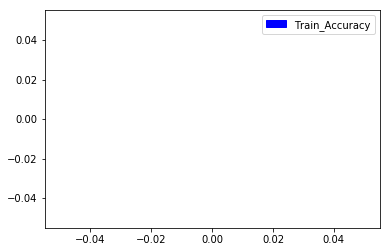

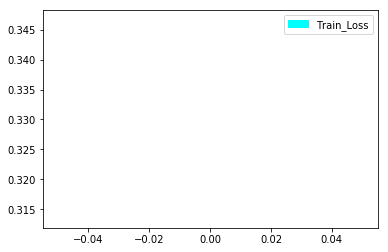

-- Epoch 1/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3299829065799713 --


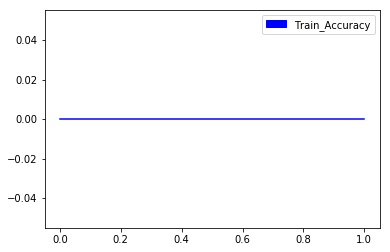

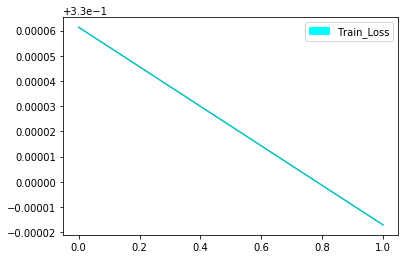

-- Epoch 2/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3299018442630768 --


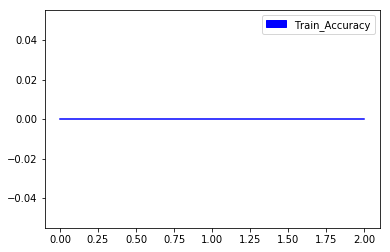

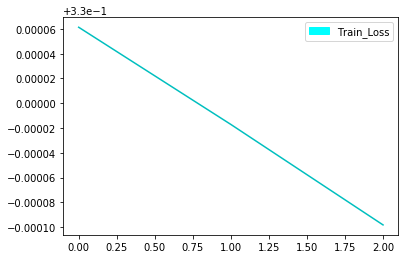

-- Epoch 3/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3298180401325226 --


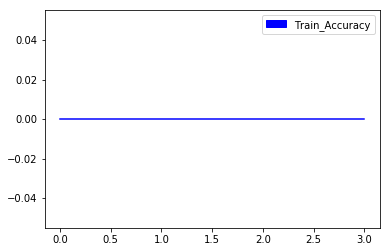

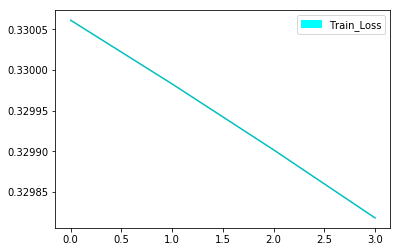

-- Epoch 4/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3297315835952759 --


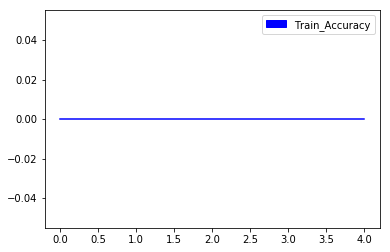

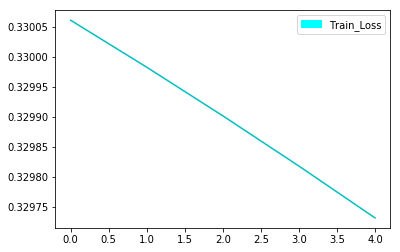

-- Epoch 5/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32964226603507996 --


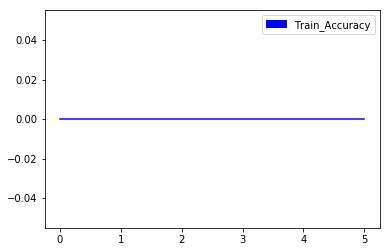

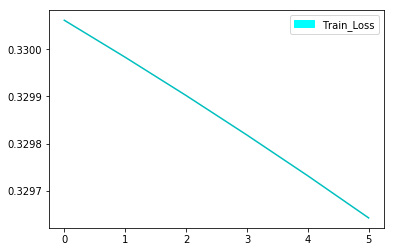

-- Epoch 6/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32955023646354675 --


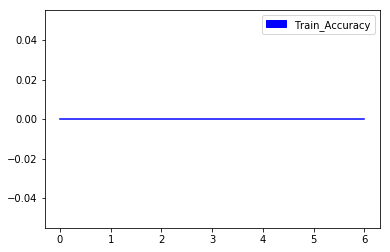

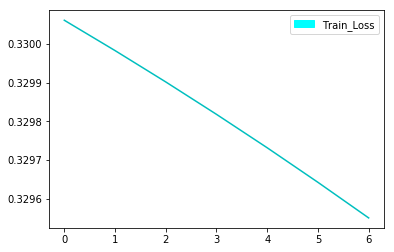

-- Epoch 7/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32945555448532104 --


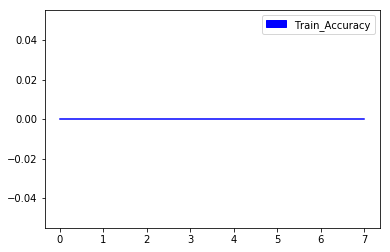

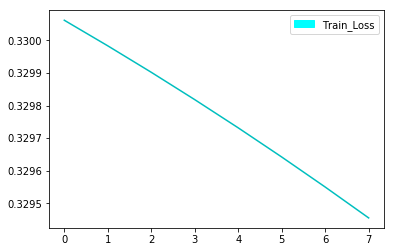

-- Epoch 8/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3293582797050476 --


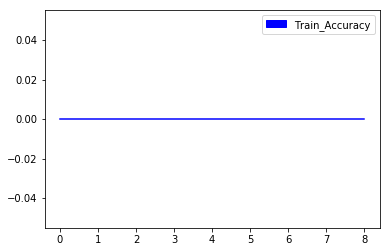

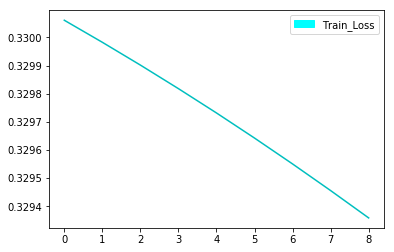

-- Epoch 9/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32925865054130554 --


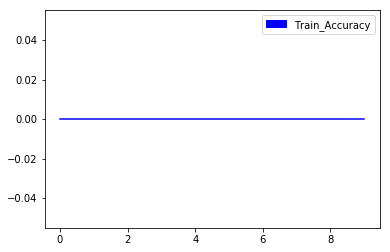

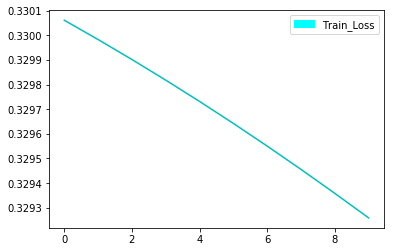

-- Epoch 10/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32915693521499634 --


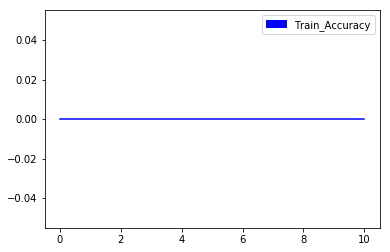

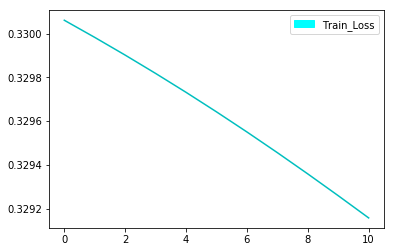

-- Epoch 11/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3290533721446991 --


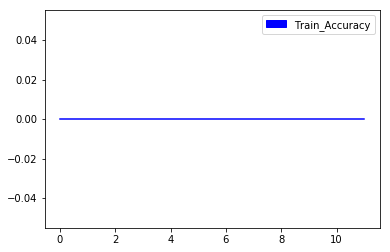

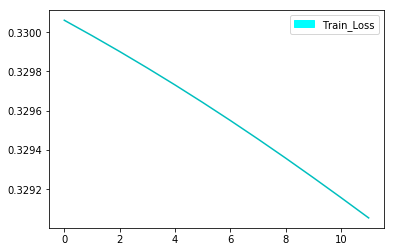

-- Epoch 12/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.328948438167572 --


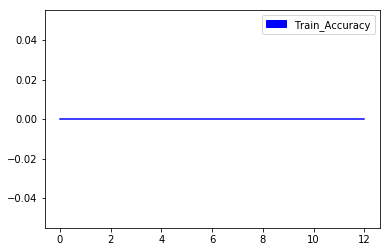

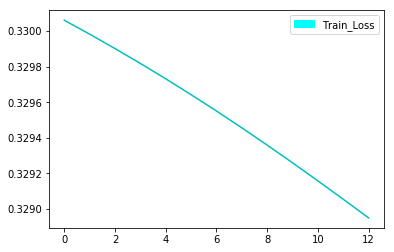

-- Epoch 13/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3288424015045166 --


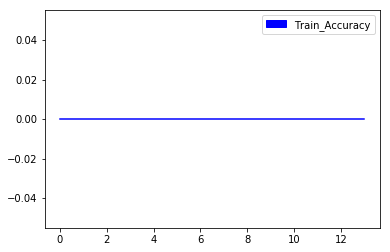

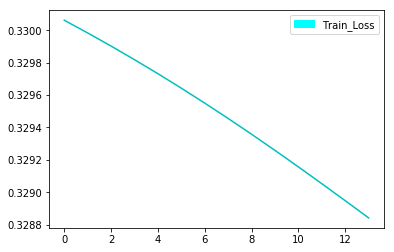

-- Epoch 14/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.328735888004303 --


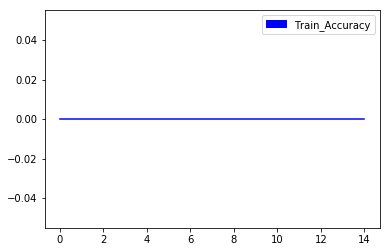

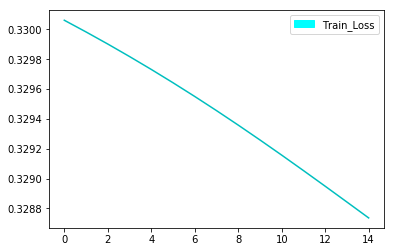

-- Epoch 15/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32862937450408936 --


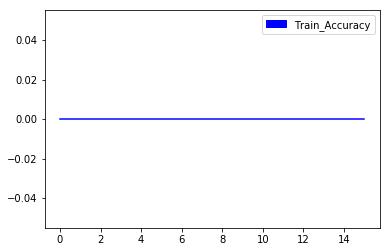

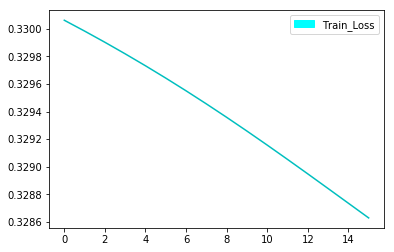

-- Epoch 16/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32852327823638916 --


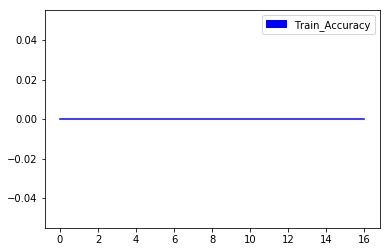

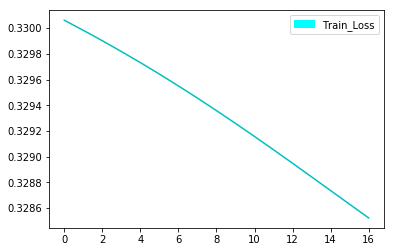

-- Epoch 17/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32841816544532776 --


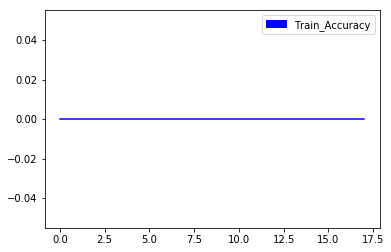

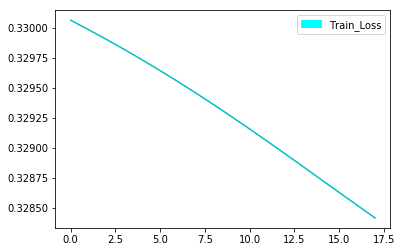

-- Epoch 18/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3283144235610962 --


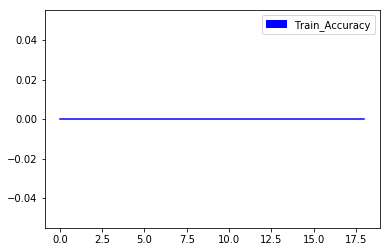

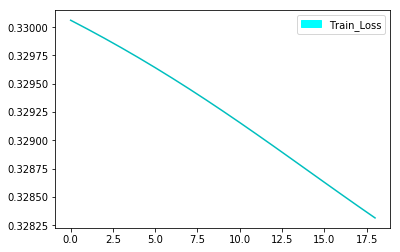

-- Epoch 19/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32821255922317505 --


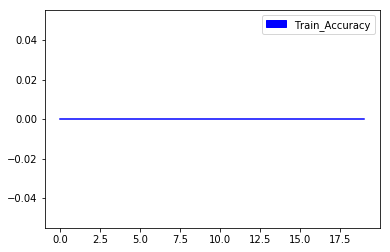

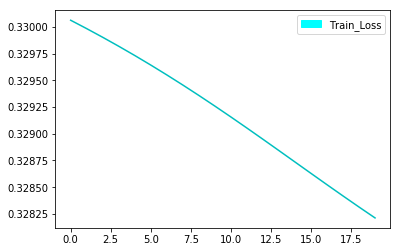

-- Epoch 20/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32811278104782104 --


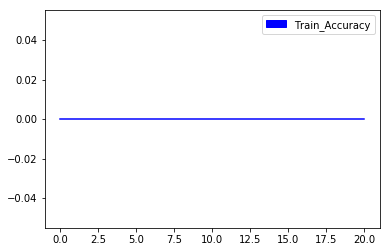

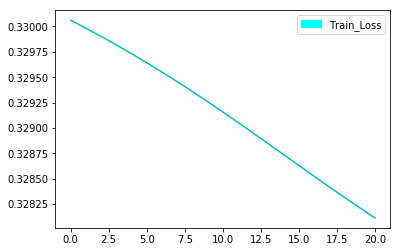

-- Epoch 21/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32801520824432373 --


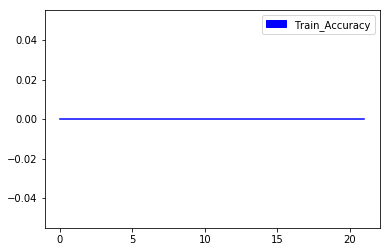

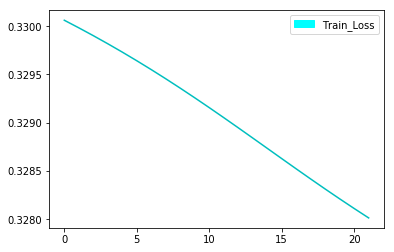

-- Epoch 22/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3279198408126831 --


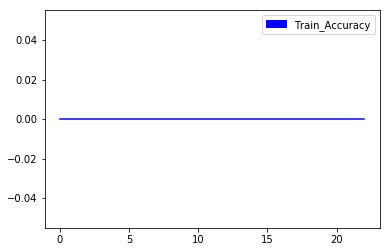

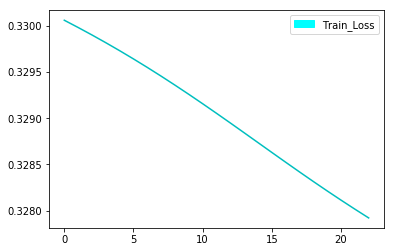

-- Epoch 23/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3278265595436096 --


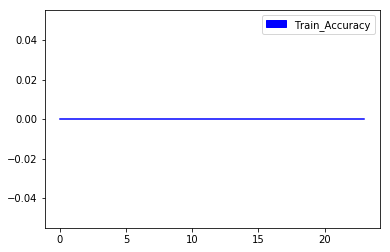

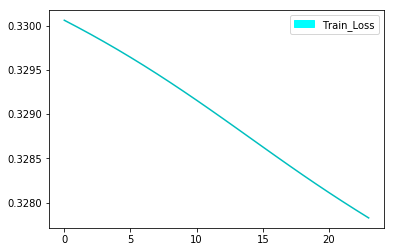

-- Epoch 24/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32773515582084656 --


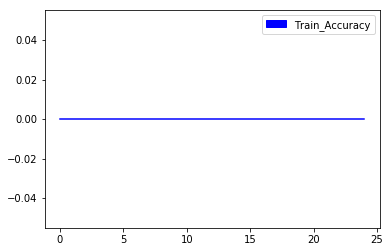

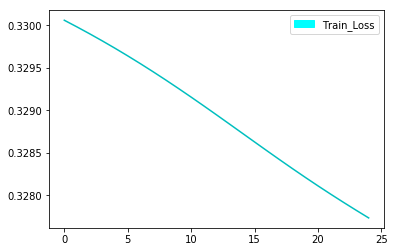

-- Epoch 25/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3276449739933014 --


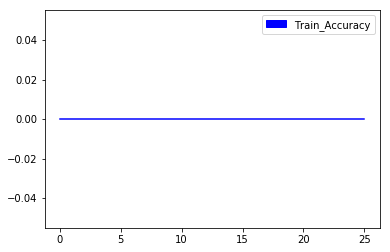

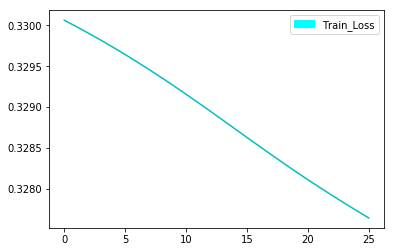

-- Epoch 26/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32755589485168457 --


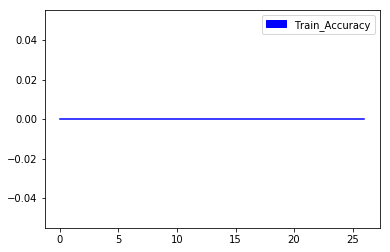

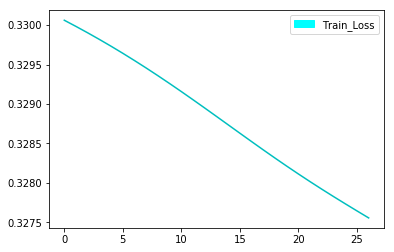

-- Epoch 27/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3274672031402588 --


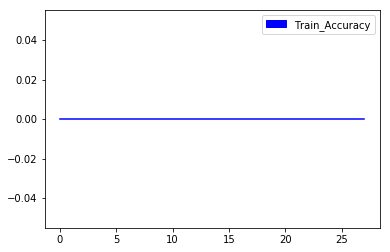

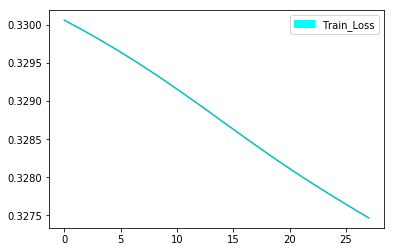

-- Epoch 28/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3273785412311554 --


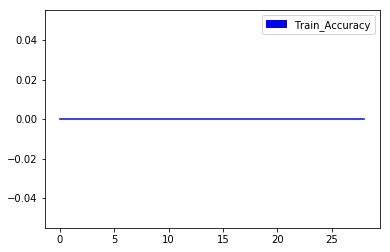

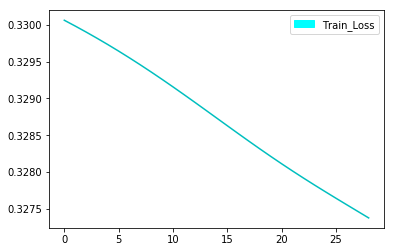

-- Epoch 29/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32728952169418335 --


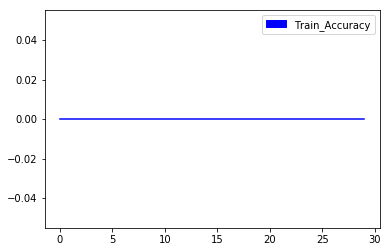

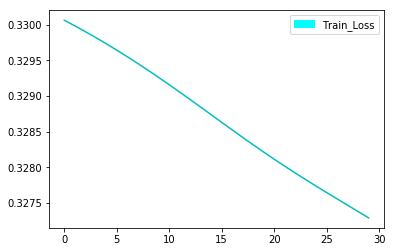

-- Epoch 30/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3271998167037964 --


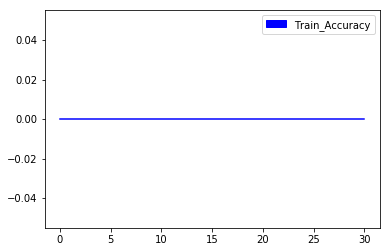

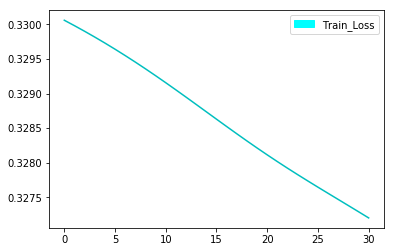

-- Epoch 31/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32710933685302734 --


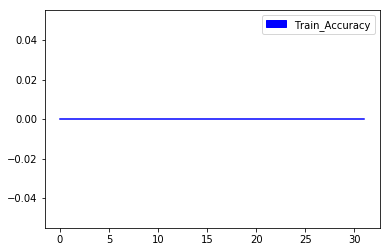

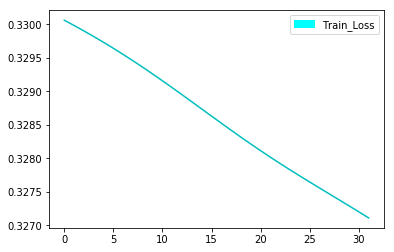

-- Epoch 32/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32701802253723145 --


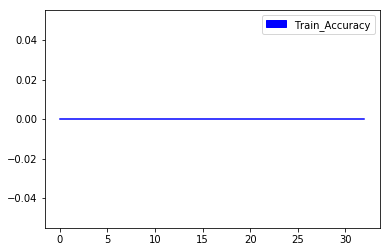

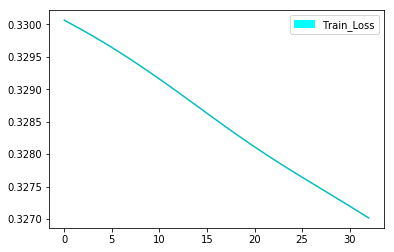

-- Epoch 33/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32692593336105347 --


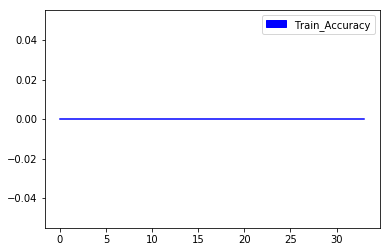

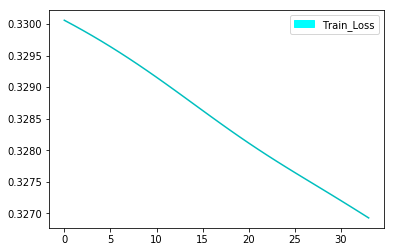

-- Epoch 34/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3268333673477173 --


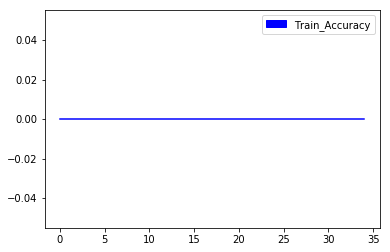

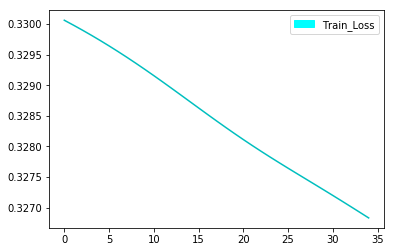

-- Epoch 35/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32674065232276917 --


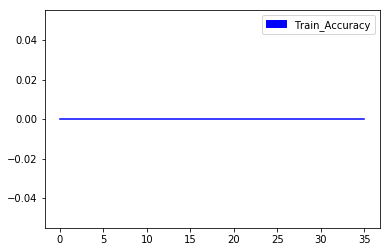

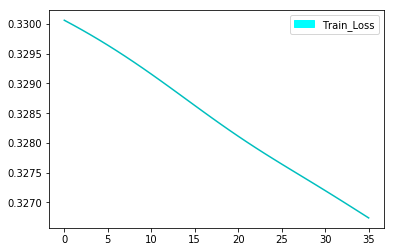

-- Epoch 36/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32664838433265686 --


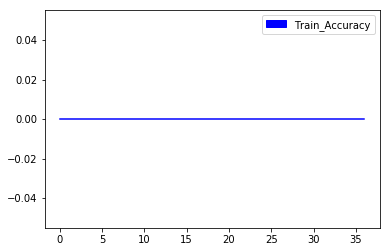

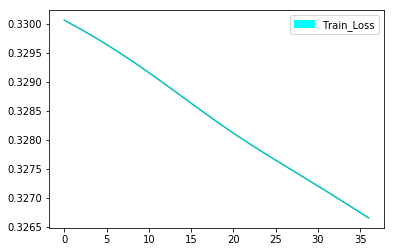

-- Epoch 37/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3265570402145386 --


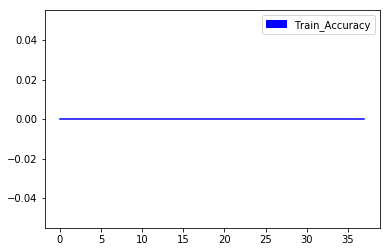

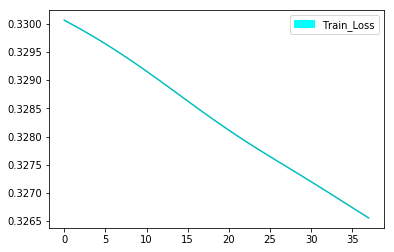

-- Epoch 38/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3264675736427307 --


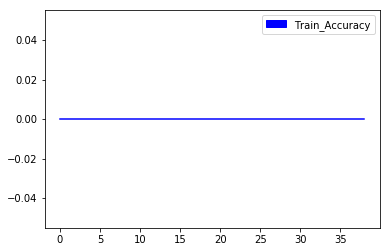

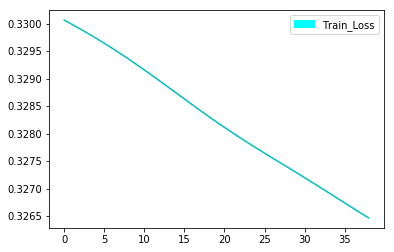

-- Epoch 39/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3263806402683258 --


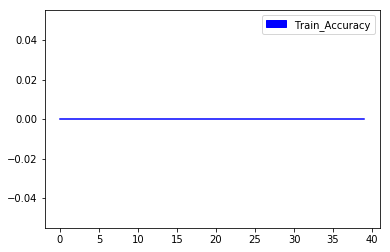

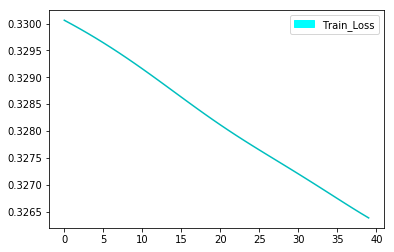

-- Epoch 40/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32629716396331787 --


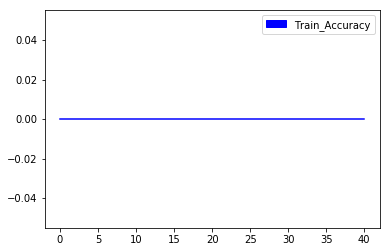

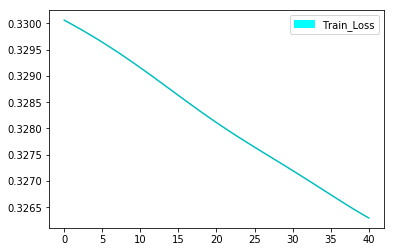

-- Epoch 41/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3262179493904114 --


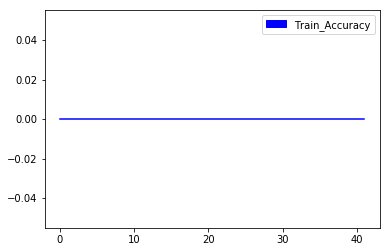

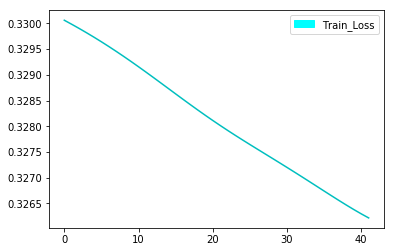

-- Epoch 42/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32614395022392273 --


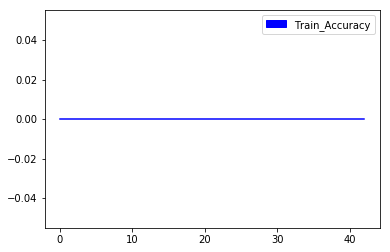

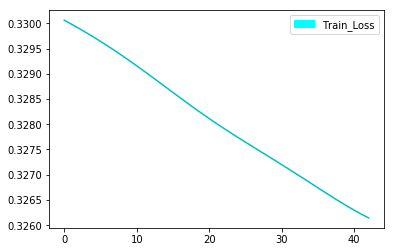

-- Epoch 43/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3260754942893982 --


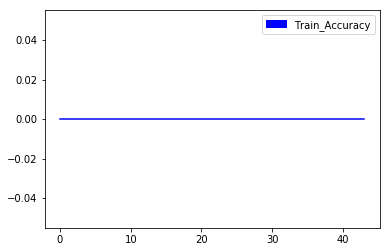

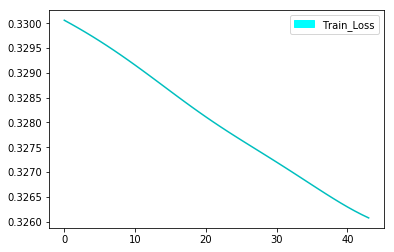

-- Epoch 44/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32601305842399597 --


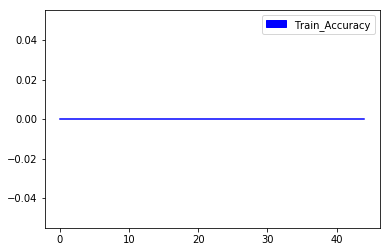

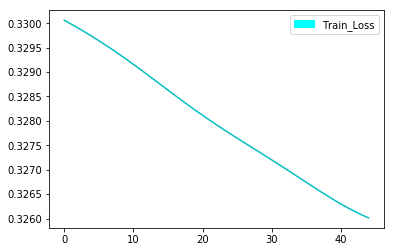

-- Epoch 45/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32595646381378174 --


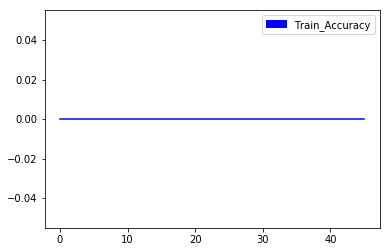

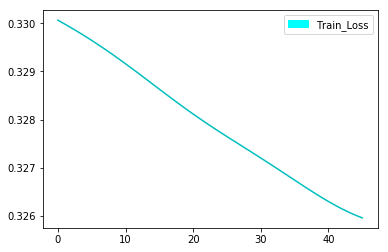

-- Epoch 46/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3259054124355316 --


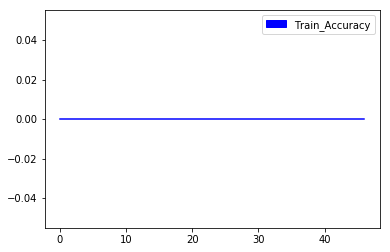

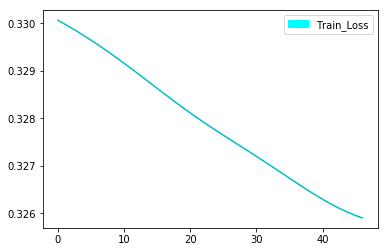

-- Epoch 47/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32585904002189636 --


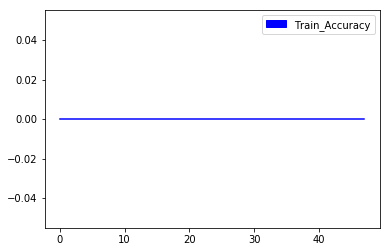

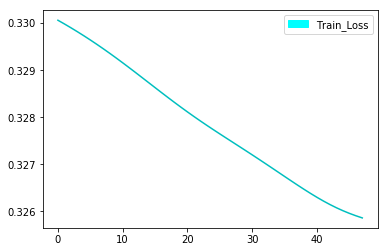

-- Epoch 48/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32581627368927 --


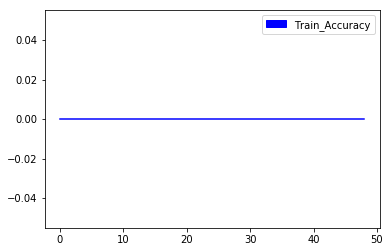

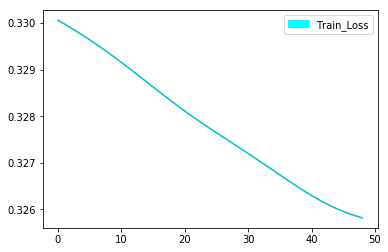

-- Epoch 49/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3257758617401123 --


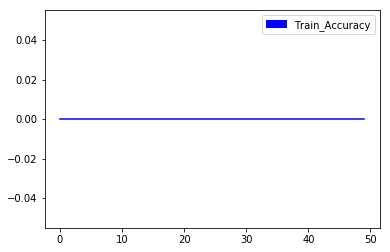

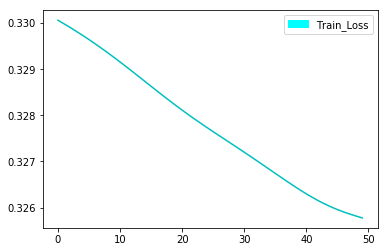

-- Epoch 50/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3257365822792053 --


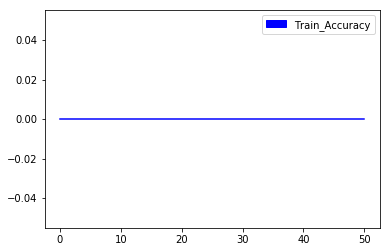

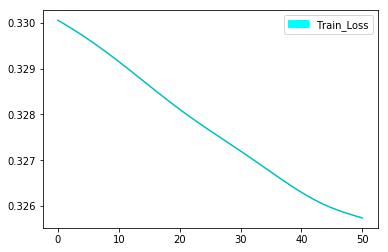

-- Epoch 51/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3256973624229431 --


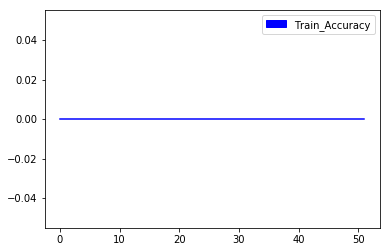

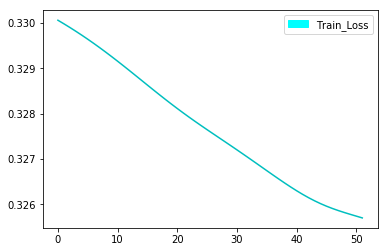

-- Epoch 52/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32565706968307495 --


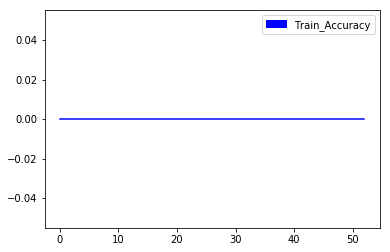

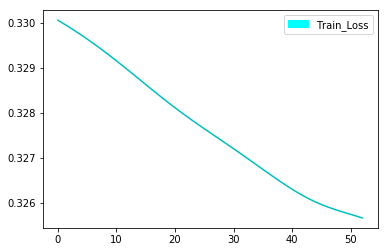

-- Epoch 53/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32561519742012024 --


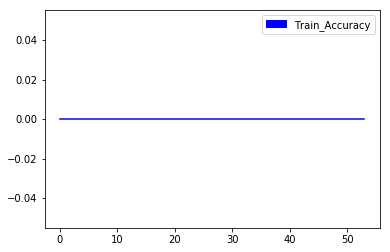

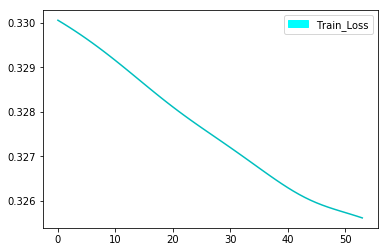

-- Epoch 54/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32557132840156555 --


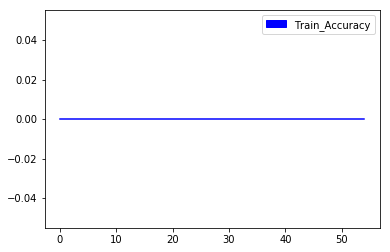

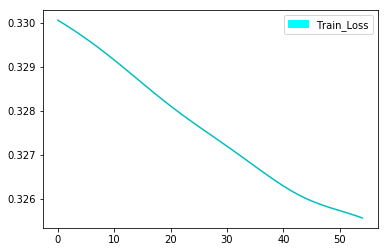

-- Epoch 55/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32552534341812134 --


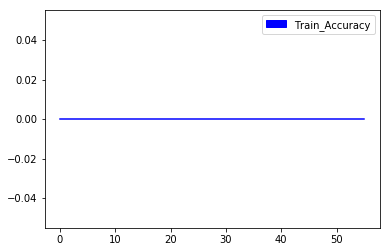

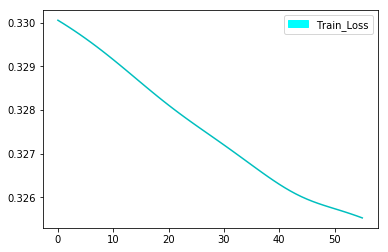

-- Epoch 56/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3254772126674652 --


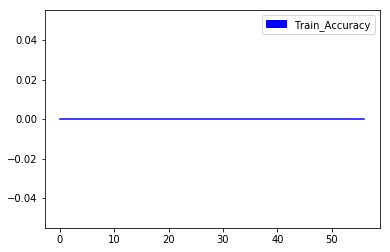

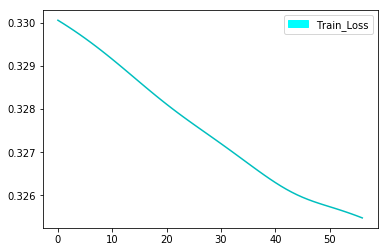

-- Epoch 57/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32542741298675537 --


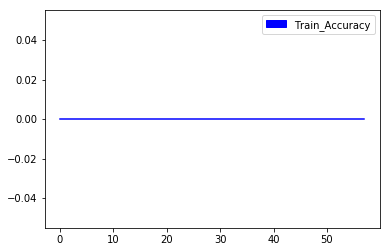

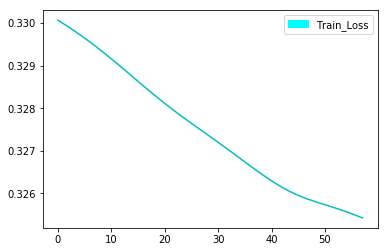

-- Epoch 58/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32537612318992615 --


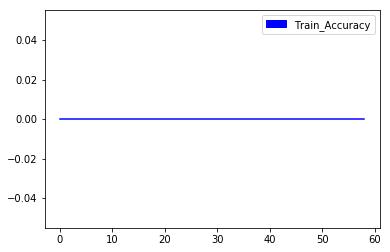

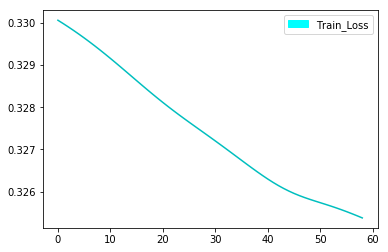

-- Epoch 59/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3253239393234253 --


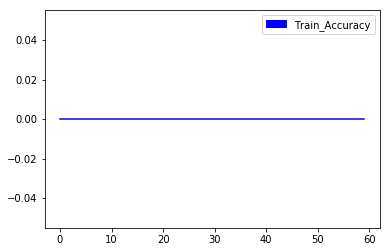

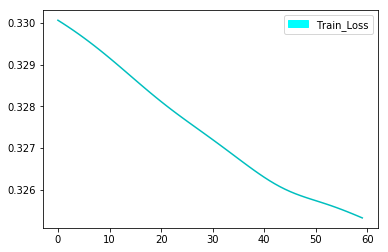

-- Epoch 60/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3252714276313782 --


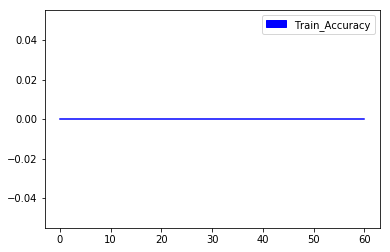

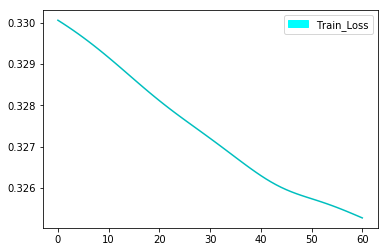

-- Epoch 61/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32521915435791016 --


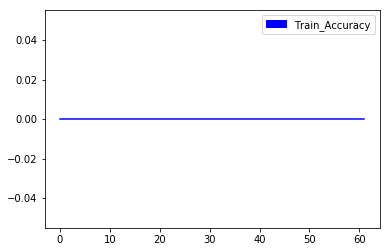

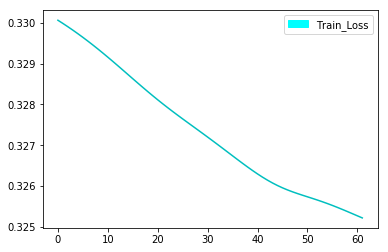

-- Epoch 62/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3251676857471466 --


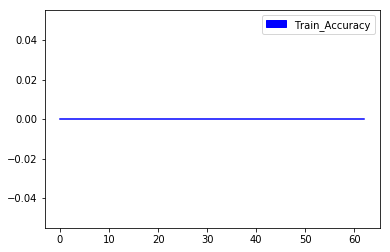

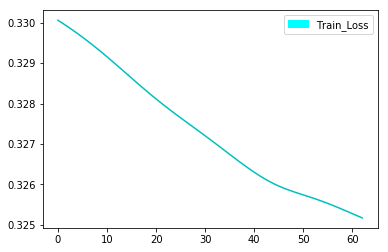

-- Epoch 63/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3251176178455353 --


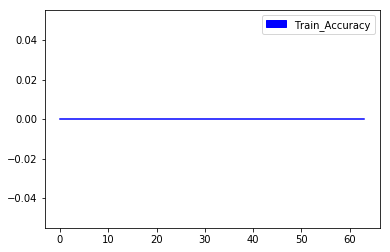

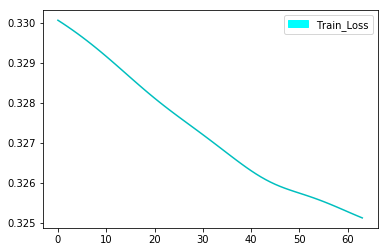

-- Epoch 64/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3250693380832672 --


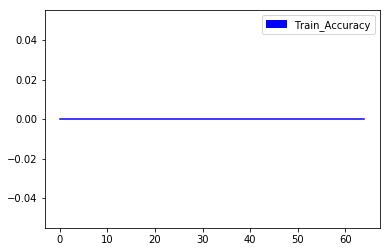

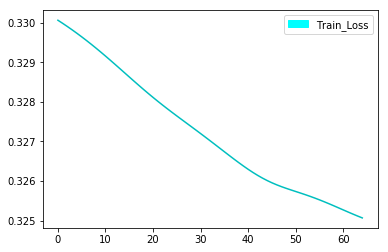

-- Epoch 65/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32502344250679016 --


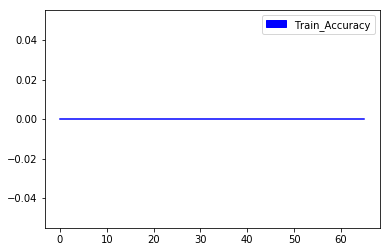

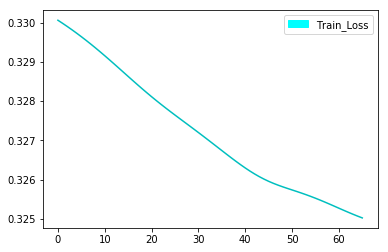

-- Epoch 66/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3249800205230713 --


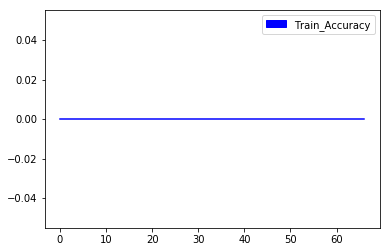

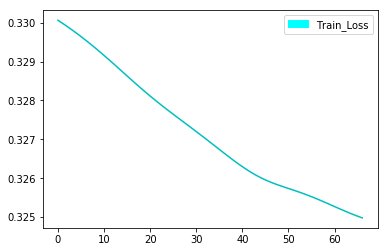

-- Epoch 67/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32493945956230164 --


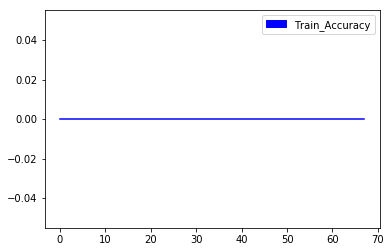

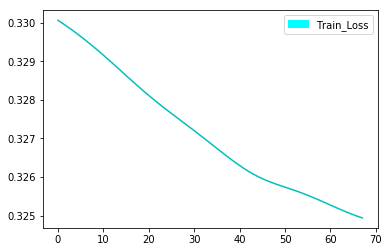

-- Epoch 68/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3249017298221588 --


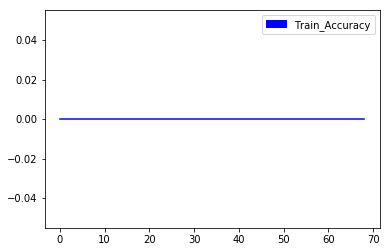

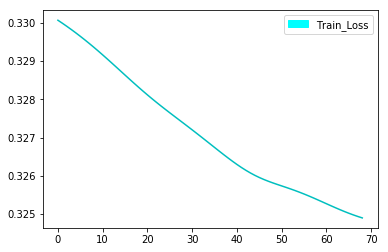

-- Epoch 69/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3248666226863861 --


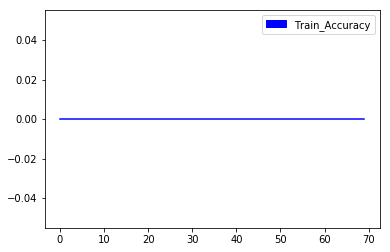

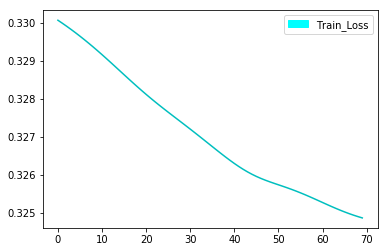

-- Epoch 70/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3248339593410492 --


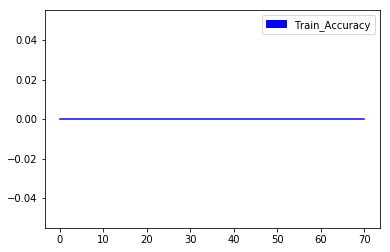

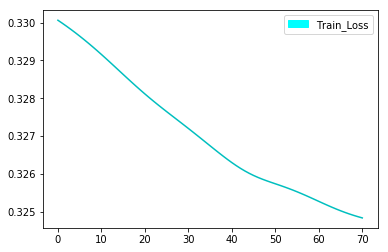

-- Epoch 71/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3248034119606018 --


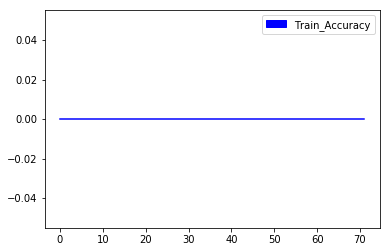

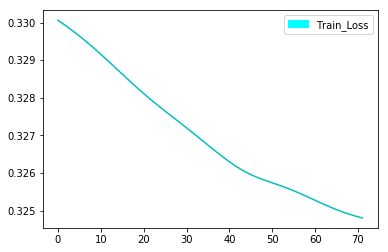

-- Epoch 72/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32477444410324097 --


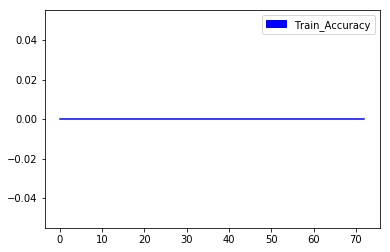

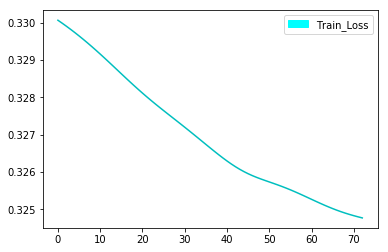

-- Epoch 73/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3247467279434204 --


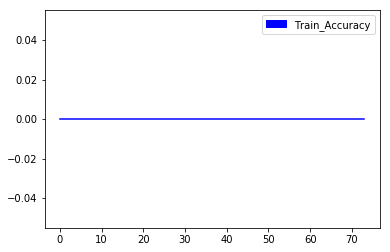

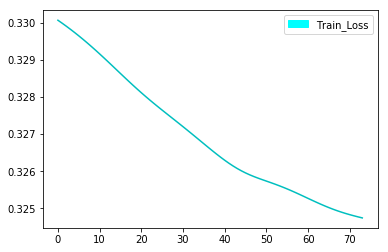

-- Epoch 74/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32471978664398193 --


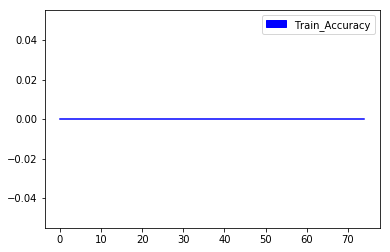

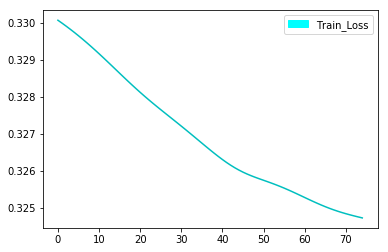

-- Epoch 75/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3246934413909912 --


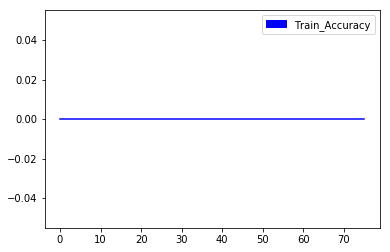

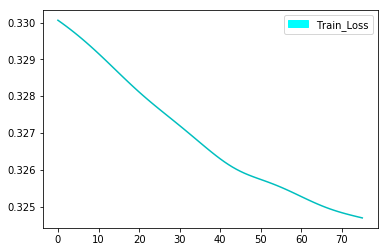

-- Epoch 76/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32466739416122437 --


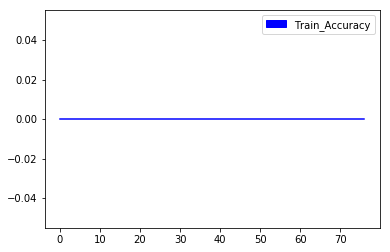

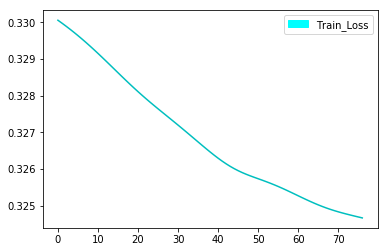

-- Epoch 77/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3246416747570038 --


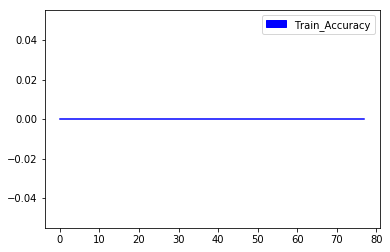

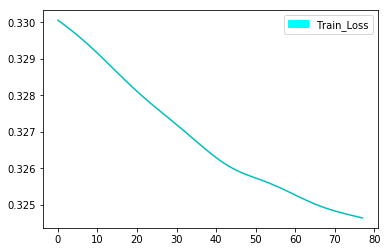

-- Epoch 78/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32461631298065186 --


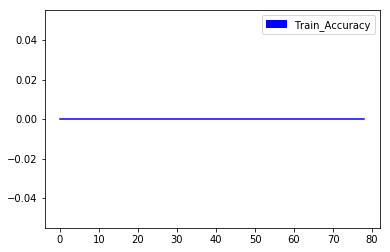

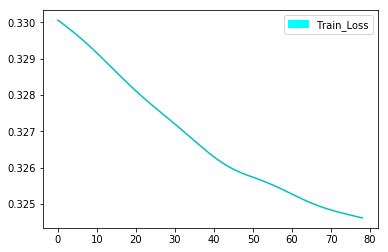

-- Epoch 79/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3245915174484253 --


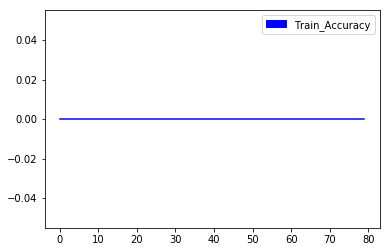

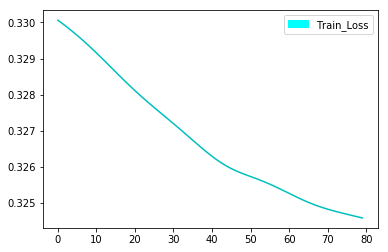

-- Epoch 80/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3245674669742584 --


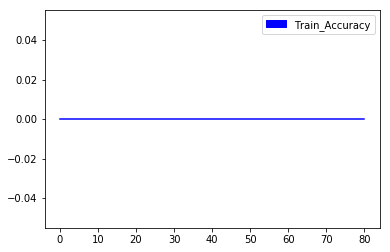

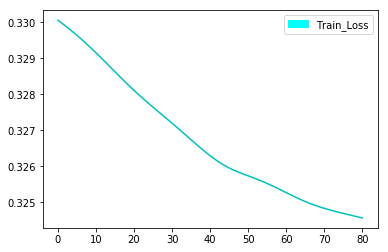

-- Epoch 81/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3245443105697632 --


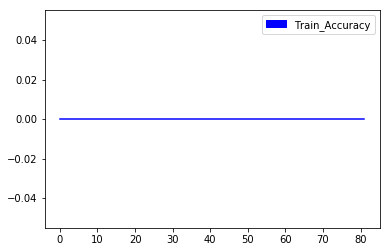

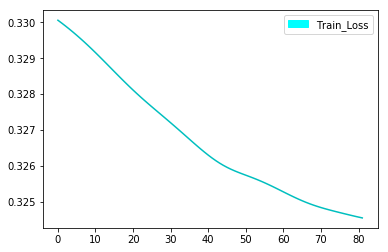

-- Epoch 82/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3245222568511963 --


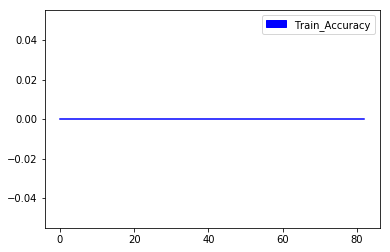

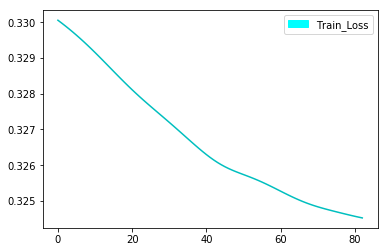

-- Epoch 83/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3245013952255249 --


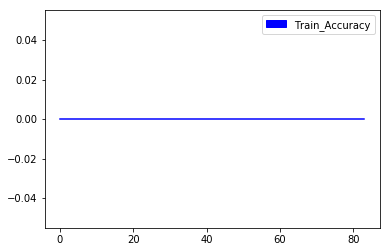

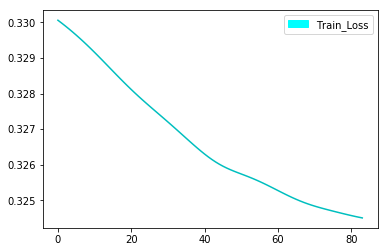

-- Epoch 84/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3244819641113281 --


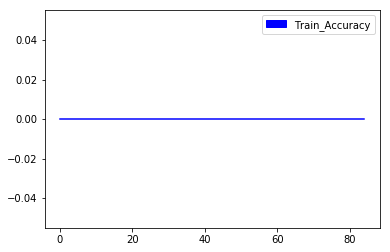

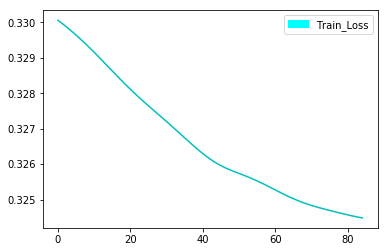

-- Epoch 85/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3244638741016388 --


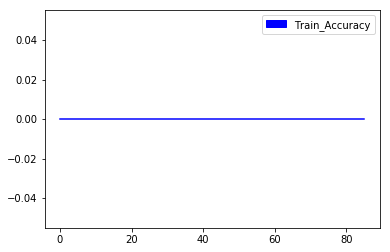

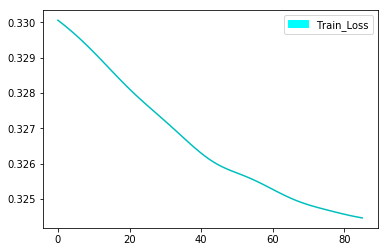

-- Epoch 86/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32444703578948975 --


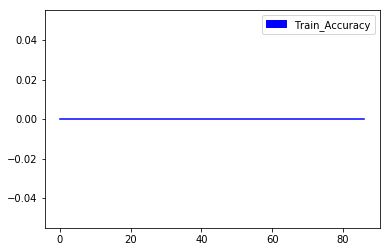

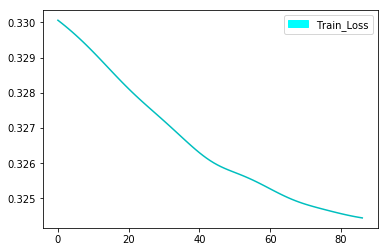

-- Epoch 87/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32443150877952576 --


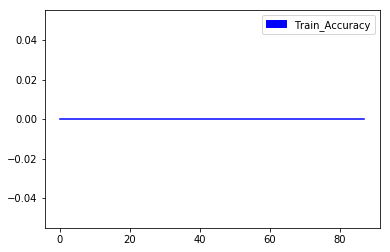

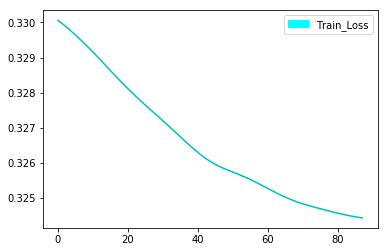

-- Epoch 88/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32441699504852295 --


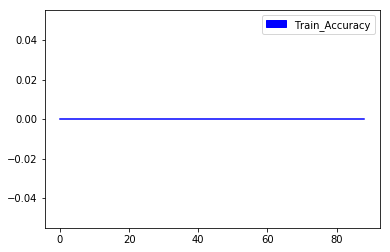

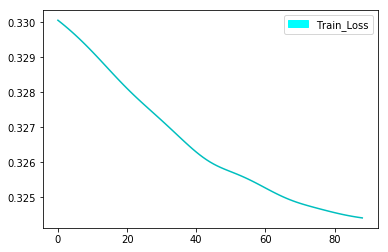

-- Epoch 89/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3244032561779022 --


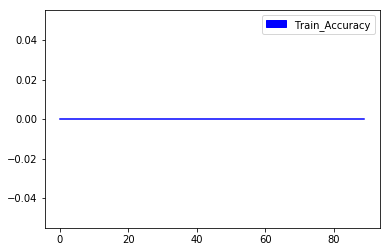

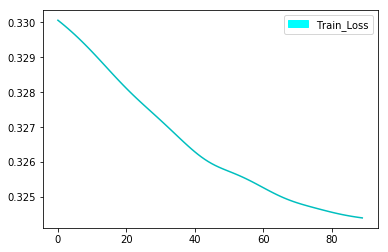

-- Epoch 90/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32439035177230835 --


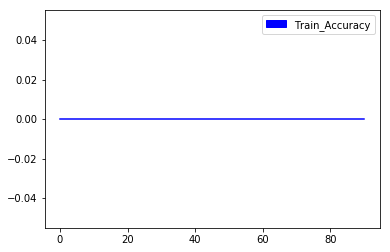

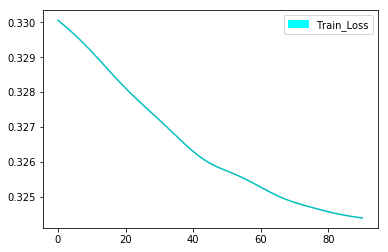

-- Epoch 91/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3243778347969055 --


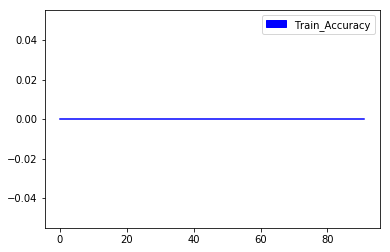

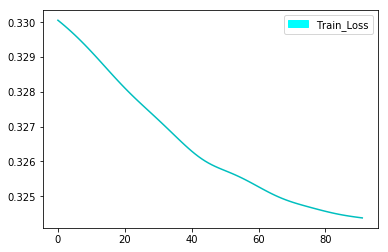

-- Epoch 92/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3243657052516937 --


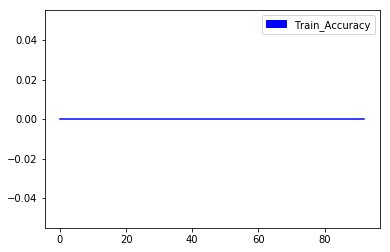

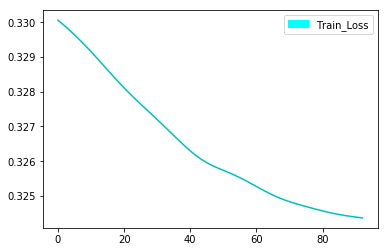

-- Epoch 93/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3243538737297058 --


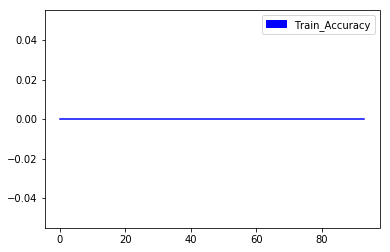

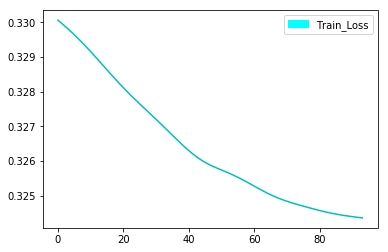

-- Epoch 94/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32434213161468506 --


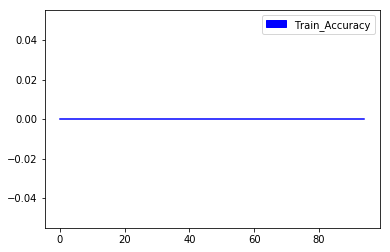

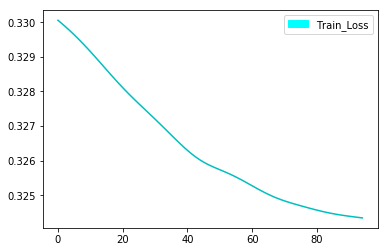

-- Epoch 95/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3243304491043091 --


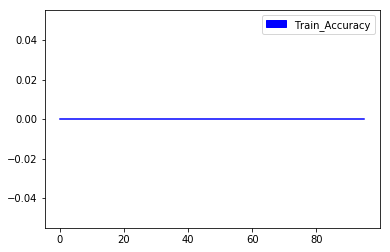

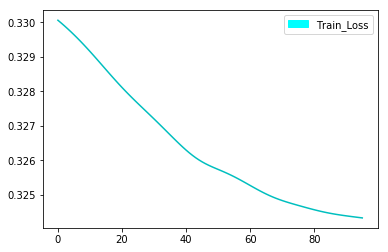

-- Epoch 96/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3243187665939331 --


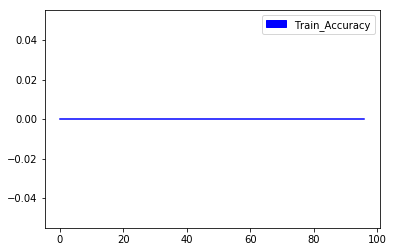

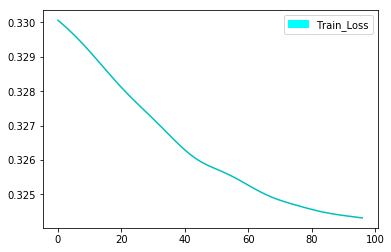

-- Epoch 97/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32430708408355713 --


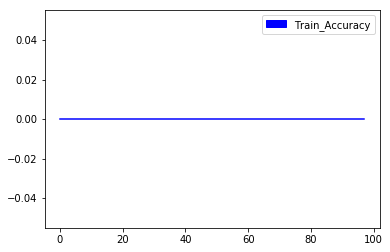

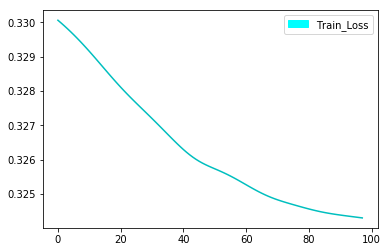

-- Epoch 98/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.324295312166214 --


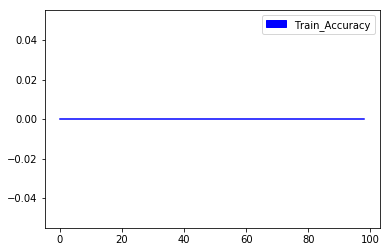

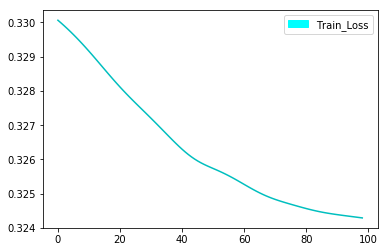

-- Epoch 99/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32428354024887085 --


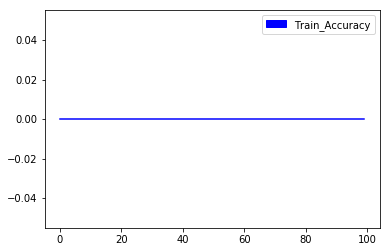

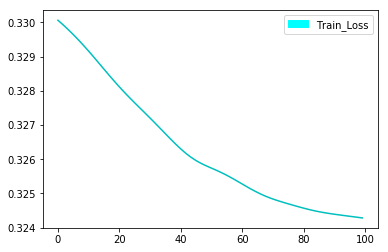

-- Epoch 100/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32427170872688293 --


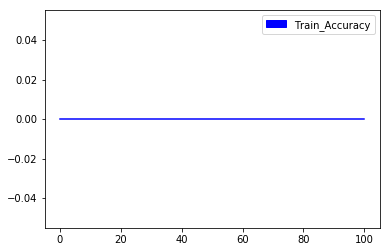

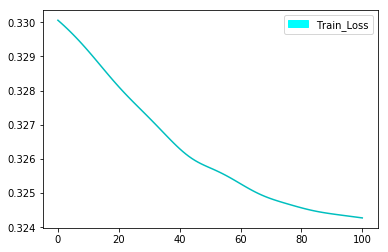

-- Epoch 101/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32425978779792786 --


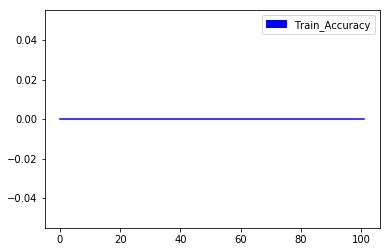

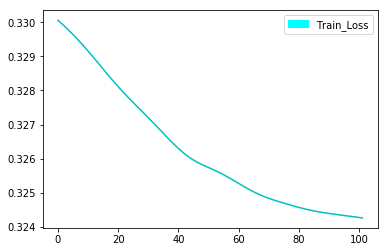

-- Epoch 102/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3242478370666504 --


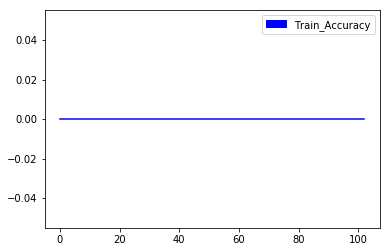

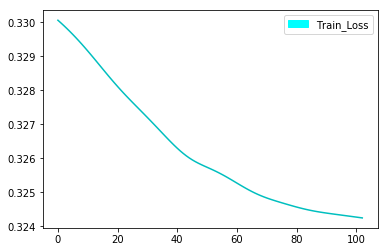

-- Epoch 103/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3242356479167938 --


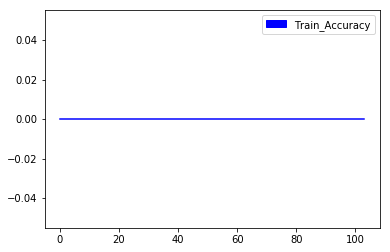

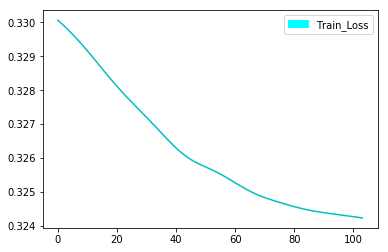

-- Epoch 104/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32422325015068054 --


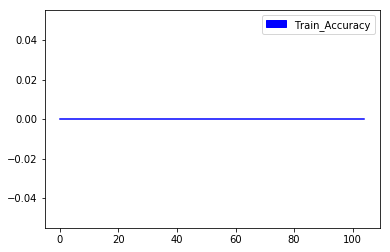

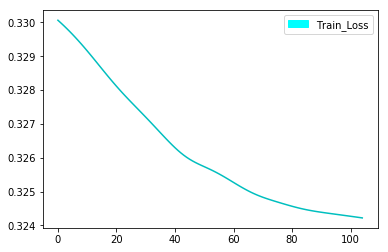

-- Epoch 105/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3242107331752777 --


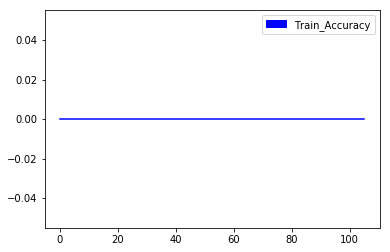

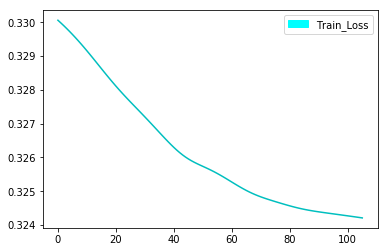

-- Epoch 106/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3241978883743286 --


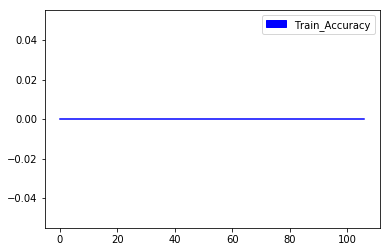

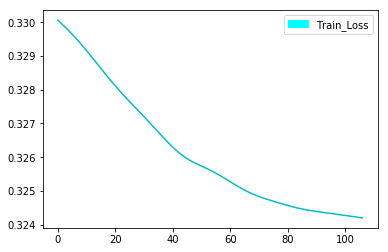

-- Epoch 107/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3241846561431885 --


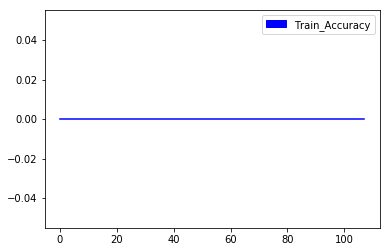

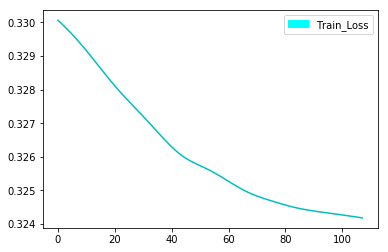

-- Epoch 108/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3241710364818573 --


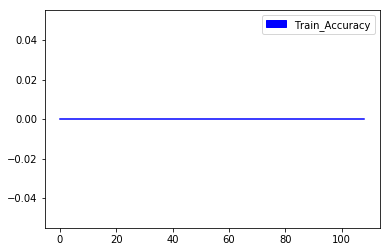

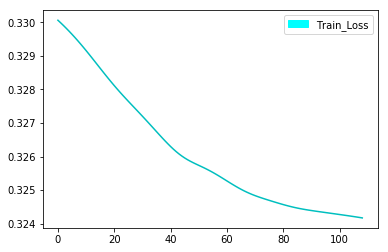

-- Epoch 109/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3241569399833679 --


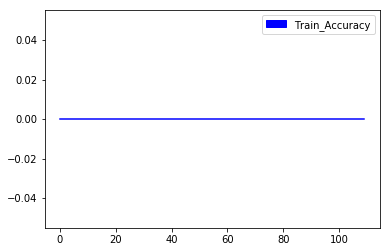

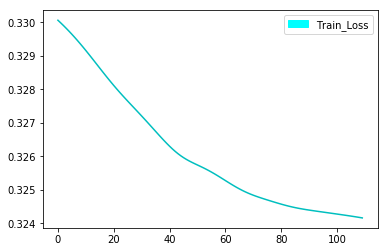

-- Epoch 110/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32414236664772034 --


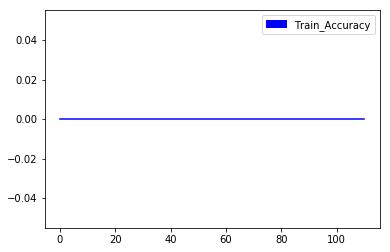

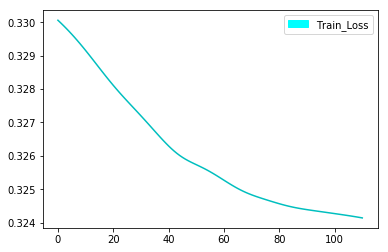

-- Epoch 111/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32412707805633545 --


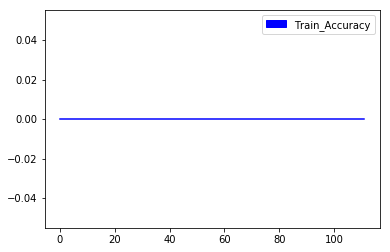

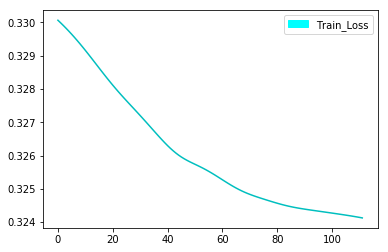

-- Epoch 112/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32411113381385803 --


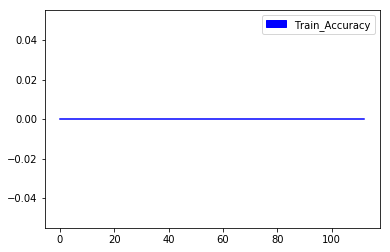

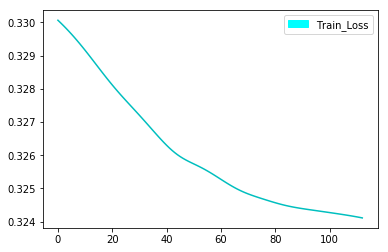

-- Epoch 113/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32409435510635376 --


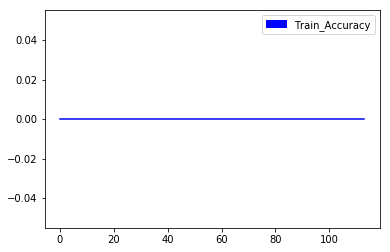

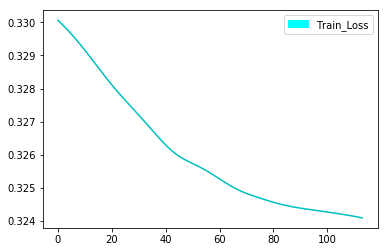

-- Epoch 114/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32407671213150024 --


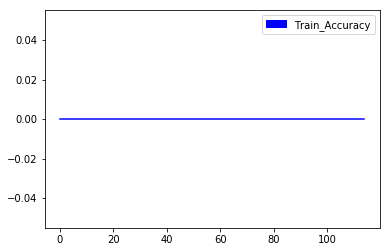

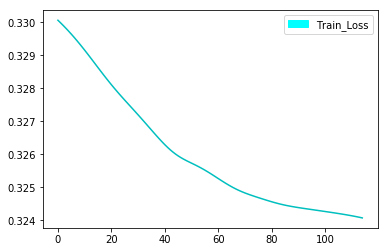

-- Epoch 115/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3240581154823303 --


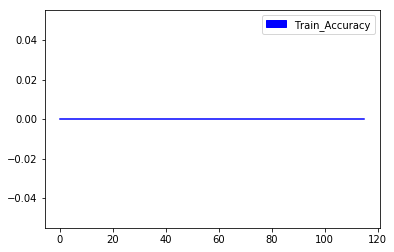

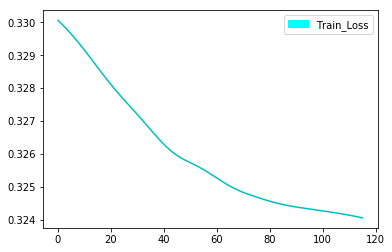

-- Epoch 116/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32403838634490967 --


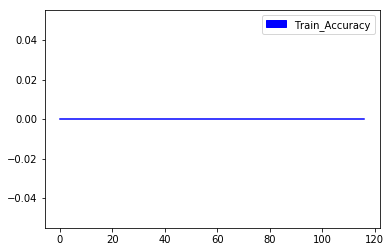

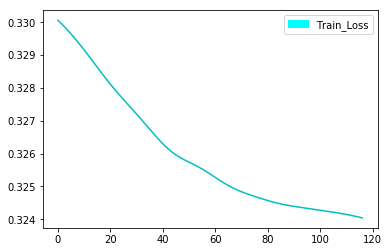

-- Epoch 117/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3240174353122711 --


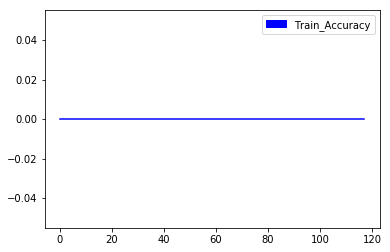

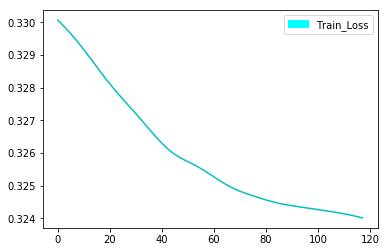

-- Epoch 118/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3239952325820923 --


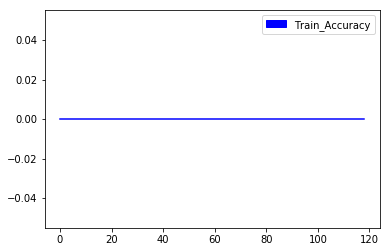

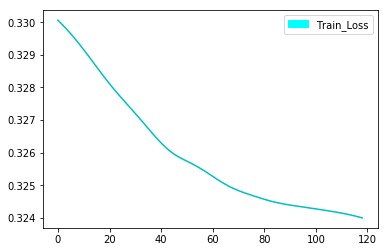

-- Epoch 119/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3239715099334717 --


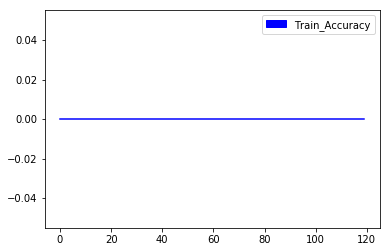

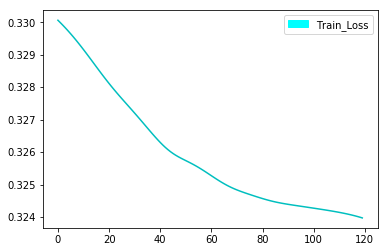

-- Epoch 120/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3239462375640869 --


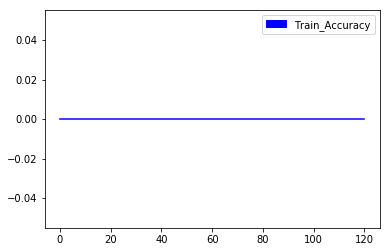

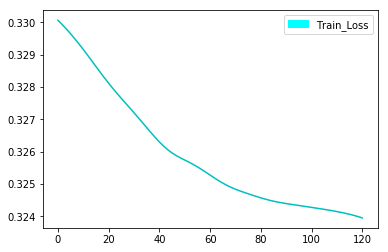

-- Epoch 121/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32391923666000366 --


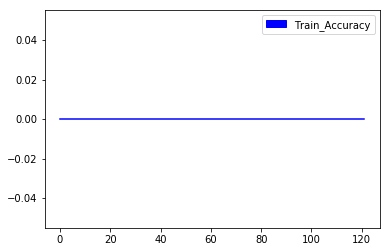

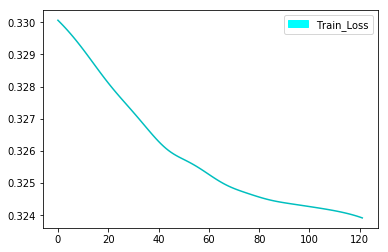

-- Epoch 122/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32389041781425476 --


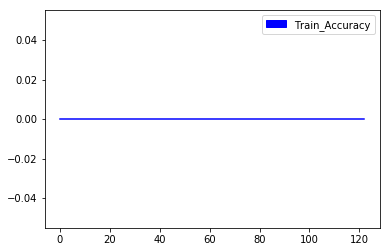

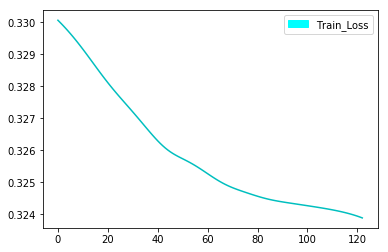

-- Epoch 123/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3238596022129059 --


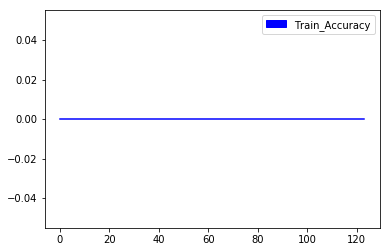

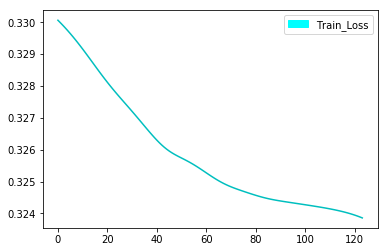

-- Epoch 124/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32382655143737793 --


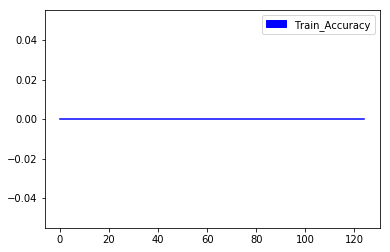

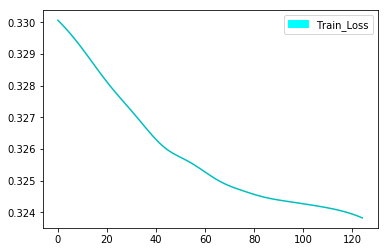

-- Epoch 125/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3237912654876709 --


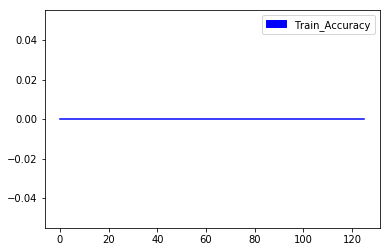

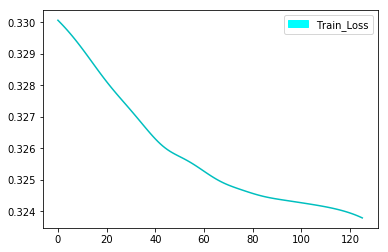

-- Epoch 126/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3237534761428833 --


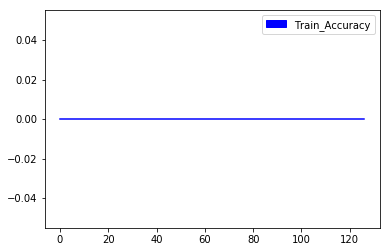

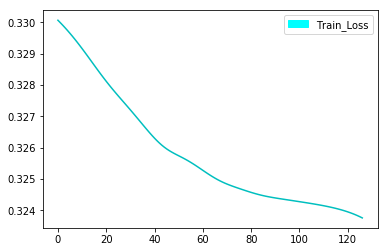

-- Epoch 127/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.3237130343914032 --


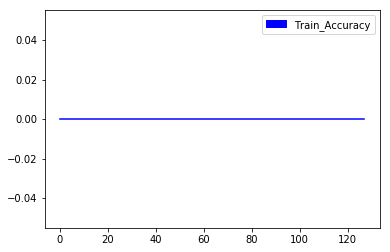

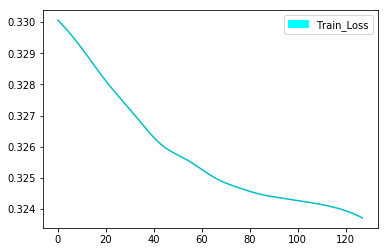

-- Epoch 128/4 --
-- Accuracy 0.0 --
-- correct 0
-- incorrect 7
-- train loss 0.32366979122161865 --


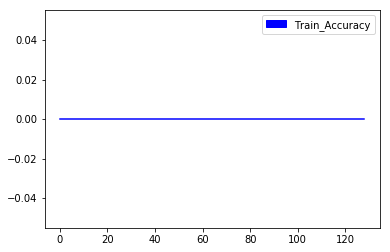

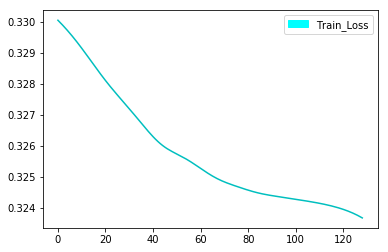

-- Epoch 129/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3236234784126282 --


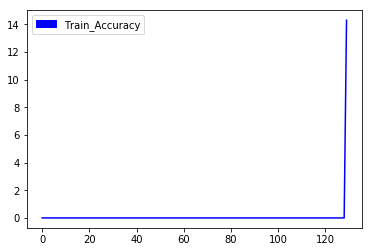

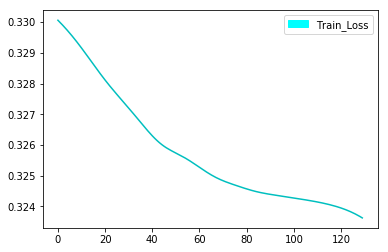

-- Epoch 130/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32357385754585266 --


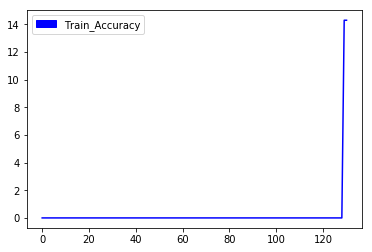

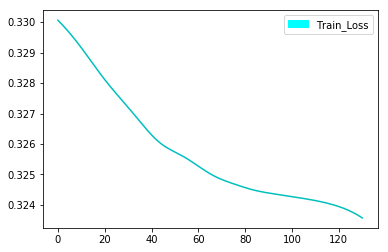

-- Epoch 131/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.323520690202713 --


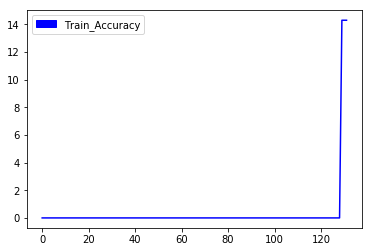

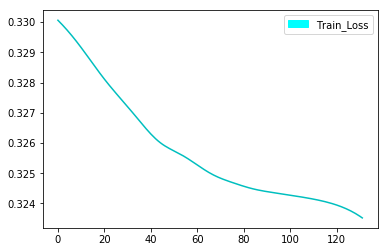

-- Epoch 132/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3234638273715973 --


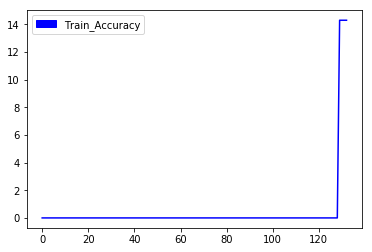

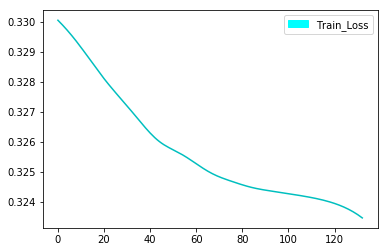

-- Epoch 133/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32340309023857117 --


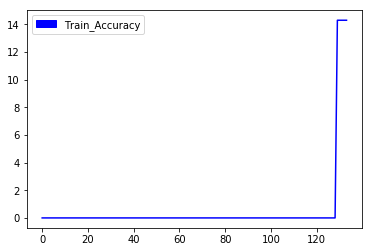

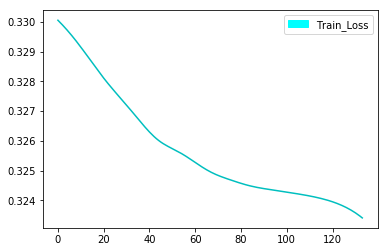

-- Epoch 134/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32333871722221375 --


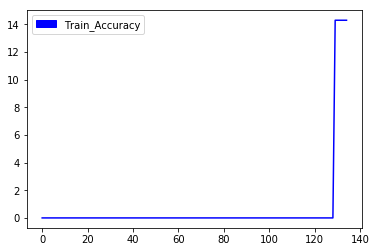

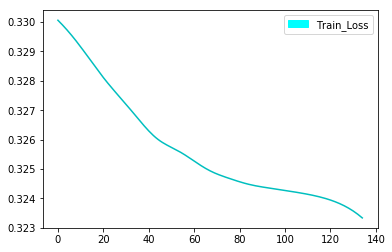

-- Epoch 135/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3232712149620056 --


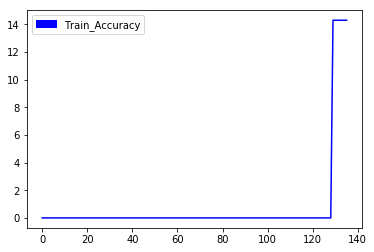

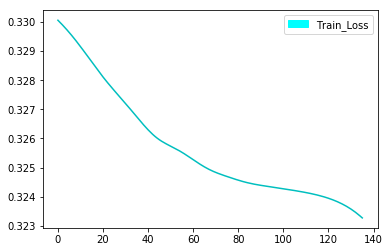

-- Epoch 136/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3232014775276184 --


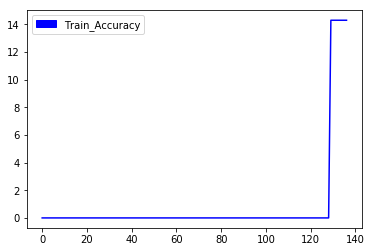

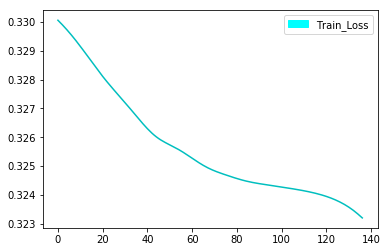

-- Epoch 137/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32313084602355957 --


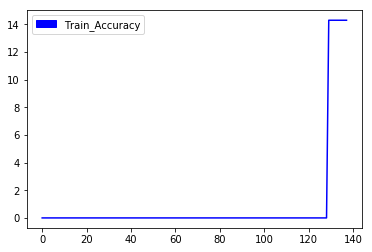

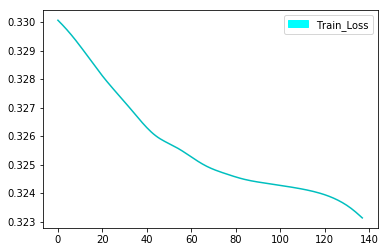

-- Epoch 138/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3230612277984619 --


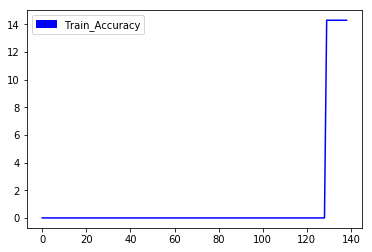

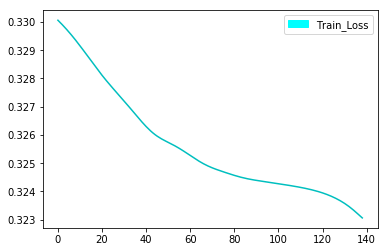

-- Epoch 139/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3229946494102478 --


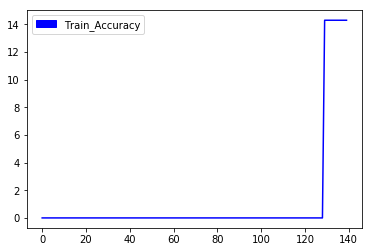

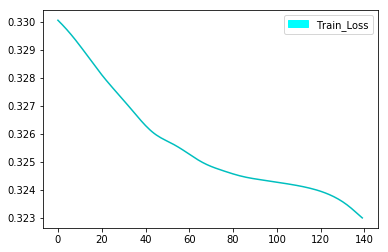

-- Epoch 140/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3229331970214844 --


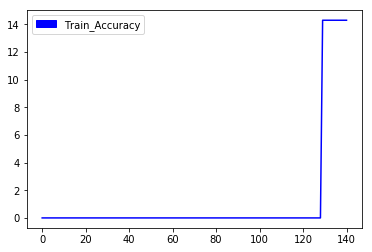

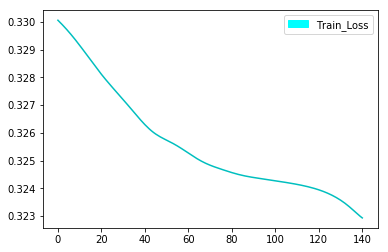

-- Epoch 141/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3228789269924164 --


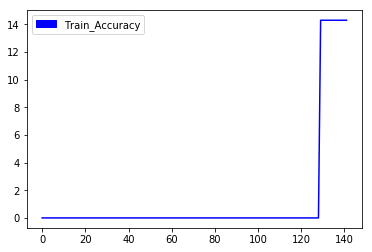

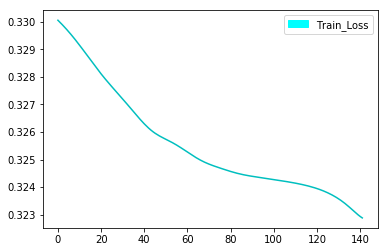

-- Epoch 142/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3228333592414856 --


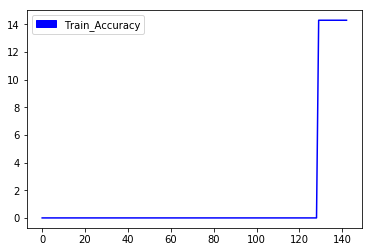

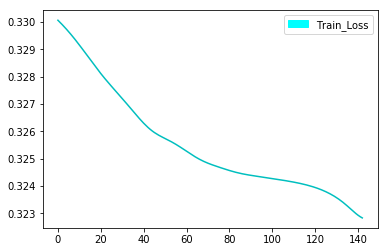

-- Epoch 143/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3227972984313965 --


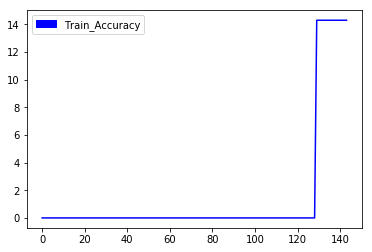

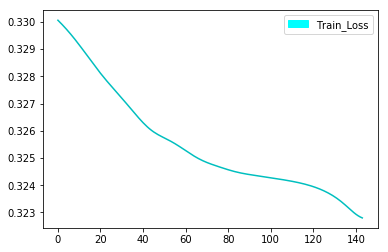

-- Epoch 144/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32277071475982666 --


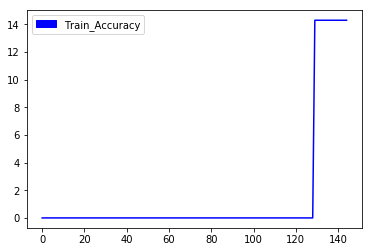

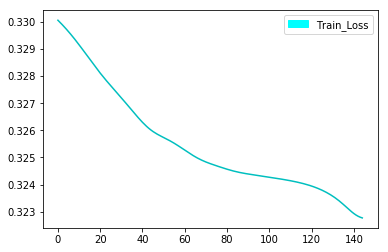

-- Epoch 145/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3227524161338806 --


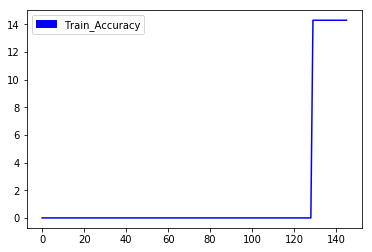

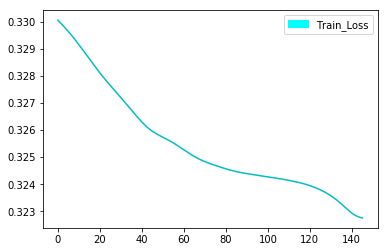

-- Epoch 146/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32274049520492554 --


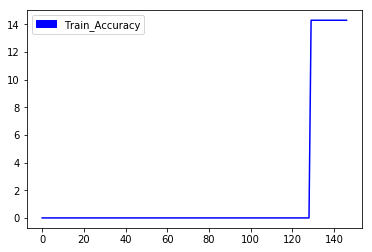

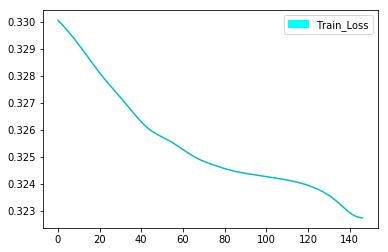

-- Epoch 147/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3227328360080719 --


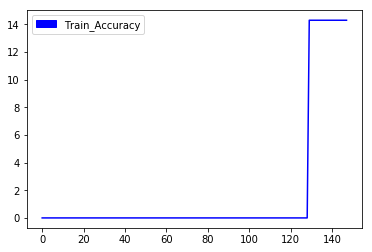

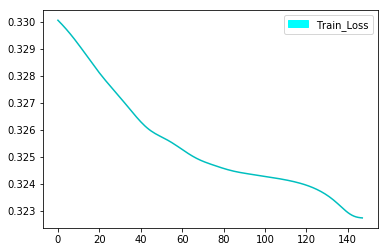

-- Epoch 148/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3227265477180481 --


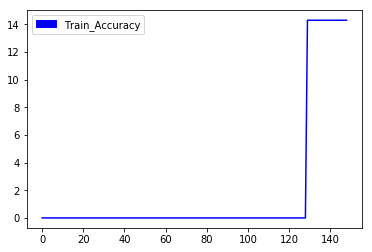

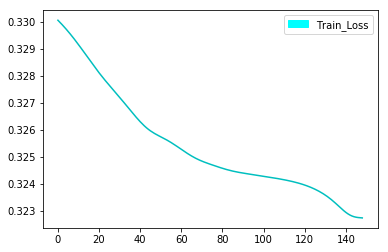

-- Epoch 149/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32271942496299744 --


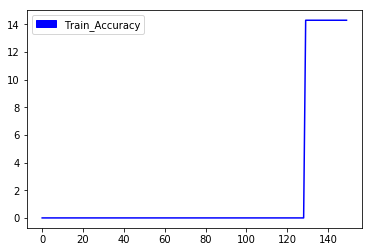

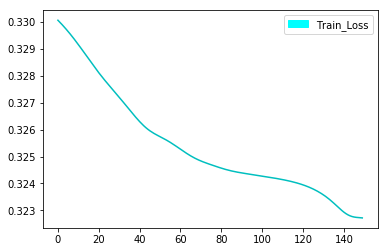

-- Epoch 150/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3227096498012543 --


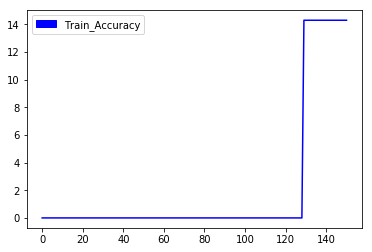

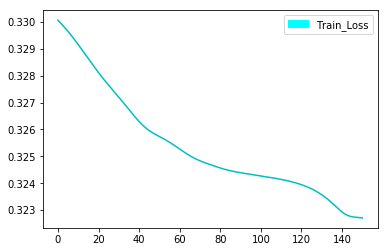

-- Epoch 151/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32269608974456787 --


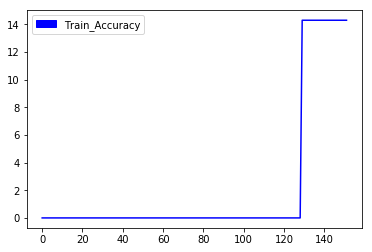

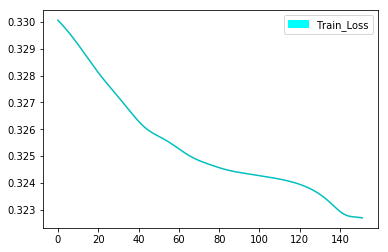

-- Epoch 152/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.32267841696739197 --


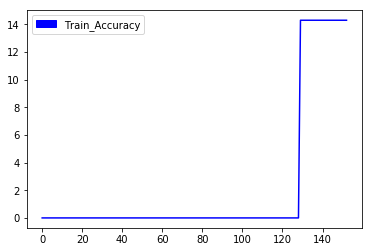

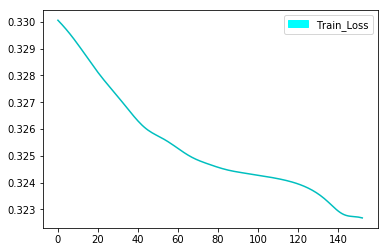

-- Epoch 153/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3226567804813385 --


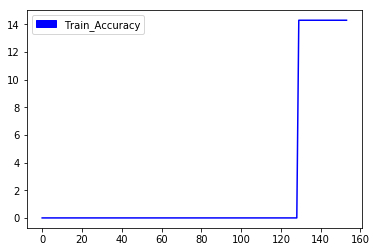

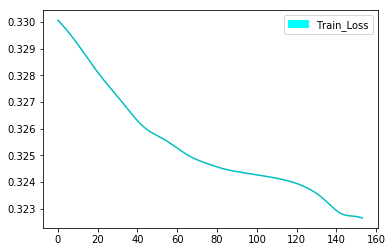

-- Epoch 154/4 --
-- Accuracy 14.285714285714285 --
-- correct 1
-- incorrect 6
-- train loss 0.3226316571235657 --


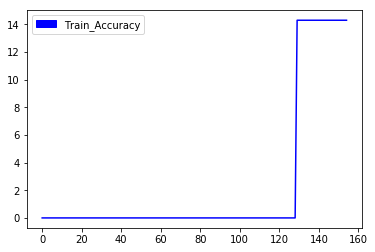

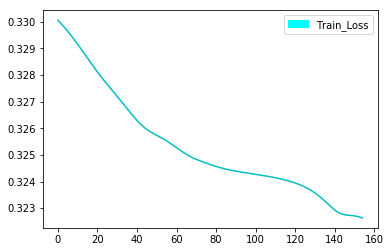

-- Epoch 155/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32260391116142273 --


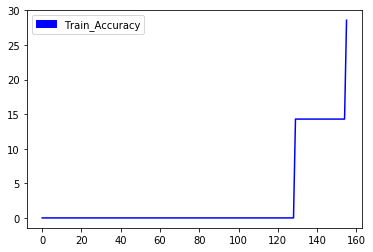

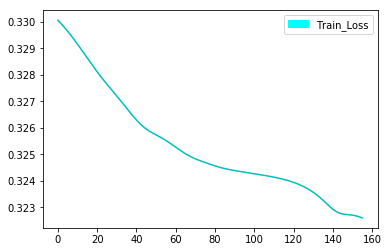

-- Epoch 156/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32257428765296936 --


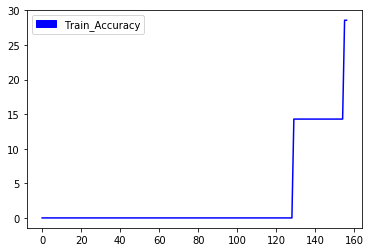

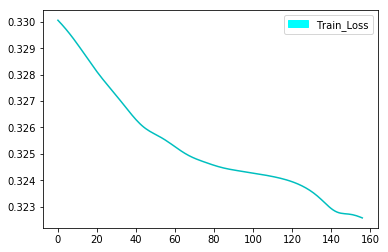

-- Epoch 157/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32254332304000854 --


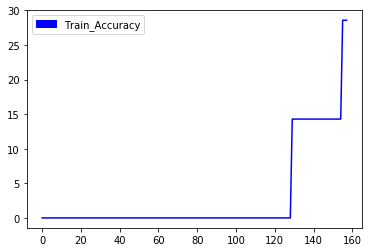

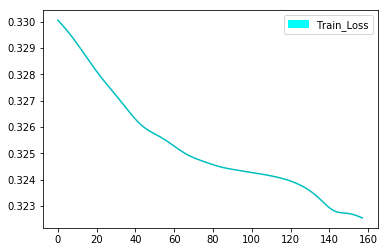

-- Epoch 158/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3225118815898895 --


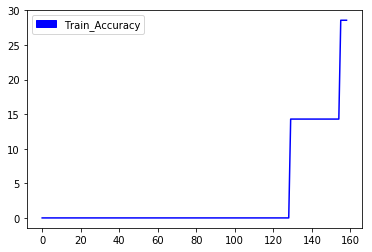

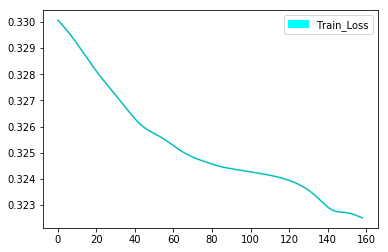

-- Epoch 159/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32248032093048096 --


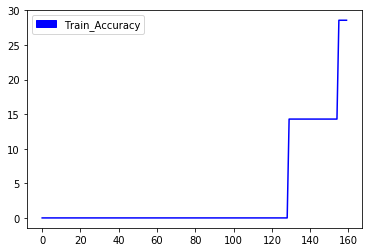

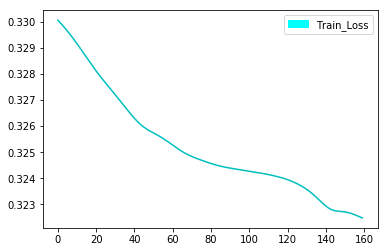

-- Epoch 160/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3224491477012634 --


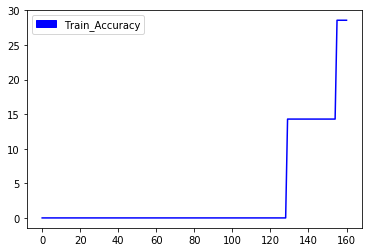

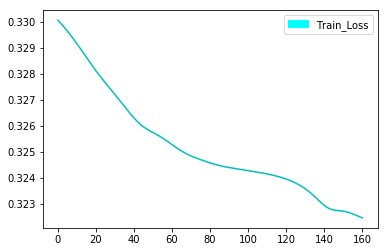

-- Epoch 161/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32241877913475037 --


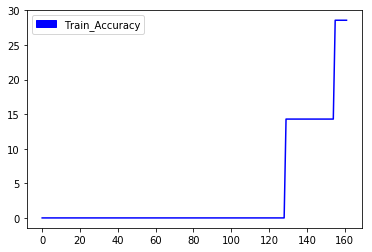

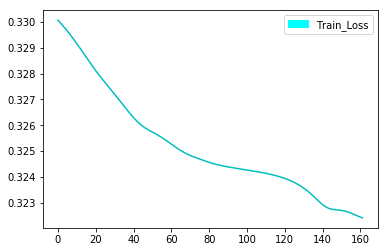

-- Epoch 162/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3223893642425537 --


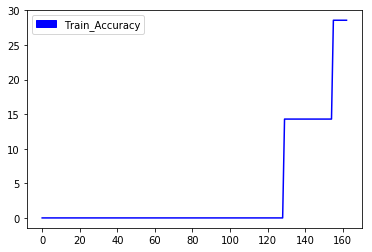

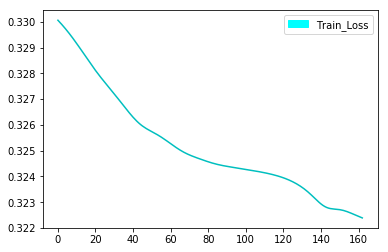

-- Epoch 163/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32236143946647644 --


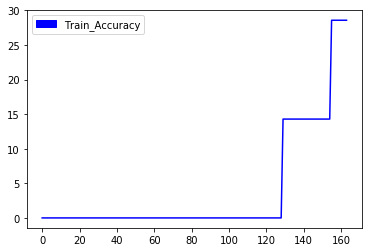

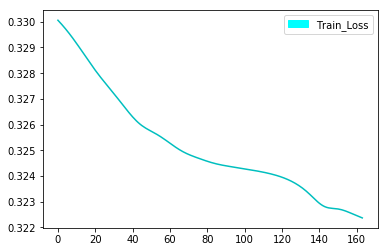

-- Epoch 164/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3223351240158081 --


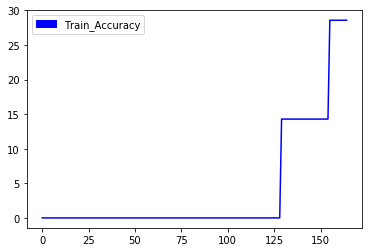

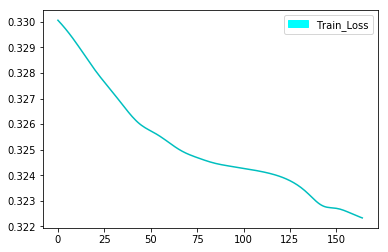

-- Epoch 165/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3223109543323517 --


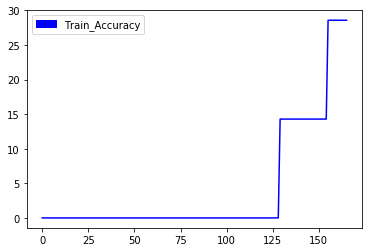

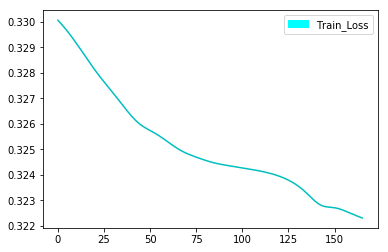

-- Epoch 166/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.322289377450943 --


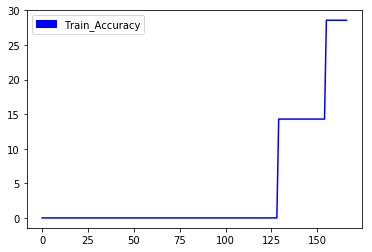

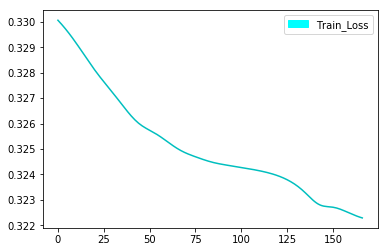

-- Epoch 167/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3222711384296417 --


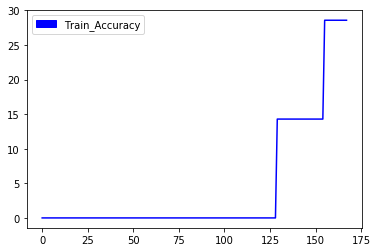

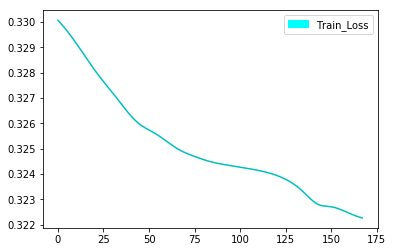

-- Epoch 168/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3222571015357971 --


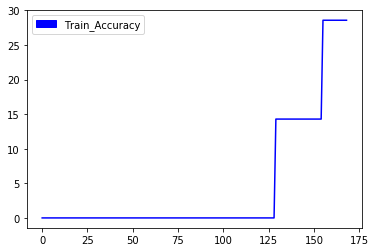

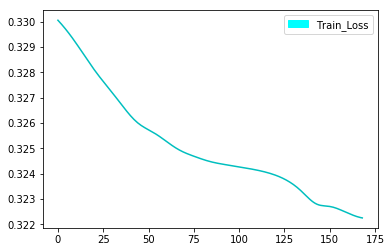

-- Epoch 169/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.32224783301353455 --


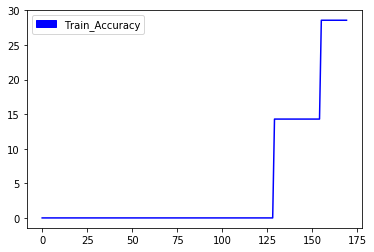

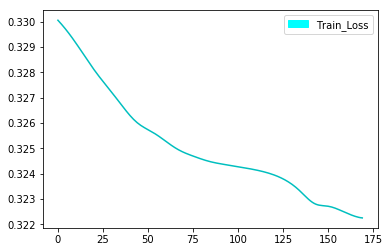

-- Epoch 170/4 --
-- Accuracy 28.57142857142857 --
-- correct 2
-- incorrect 5
-- train loss 0.3222436308860779 --


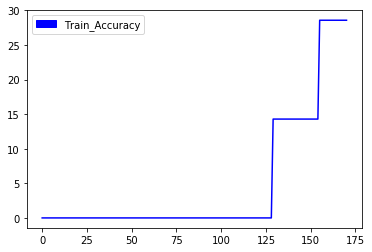

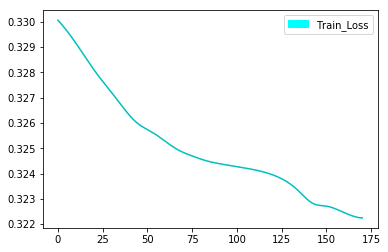

-- Epoch 171/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3222436308860779 --


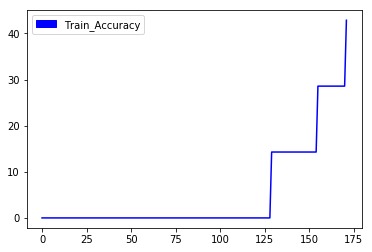

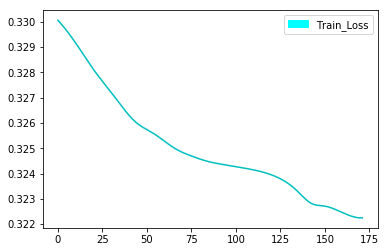

-- Epoch 172/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.322245717048645 --


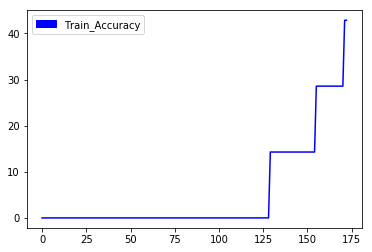

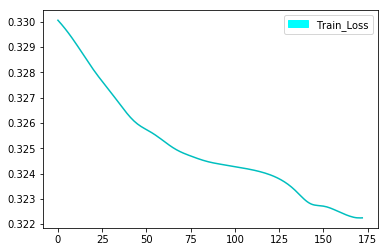

-- Epoch 173/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3222469091415405 --


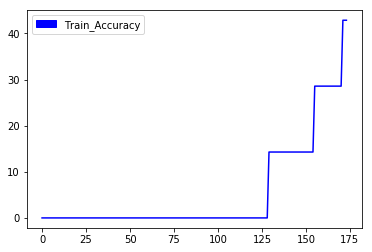

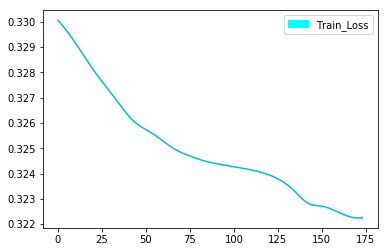

-- Epoch 174/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32224491238594055 --


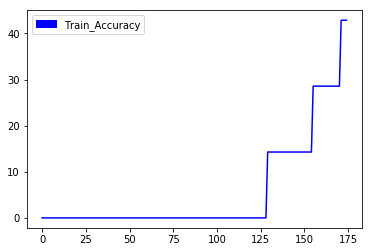

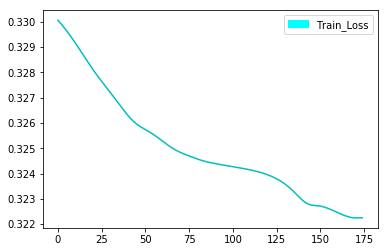

-- Epoch 175/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32223930954933167 --


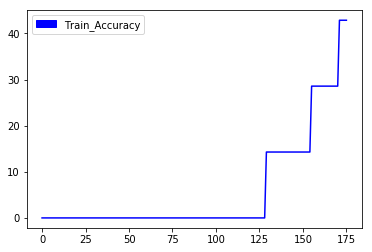

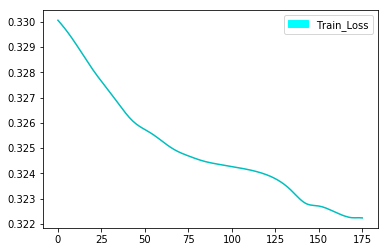

-- Epoch 176/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32223063707351685 --


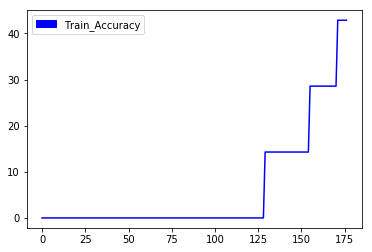

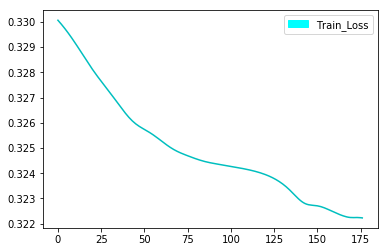

-- Epoch 177/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3222201466560364 --


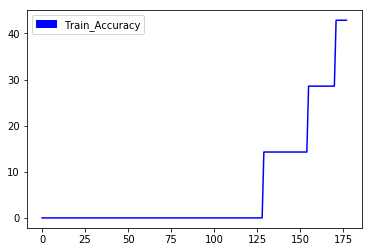

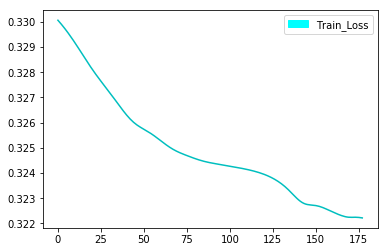

-- Epoch 178/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32220888137817383 --


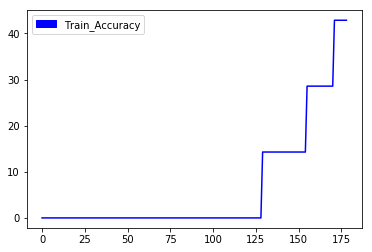

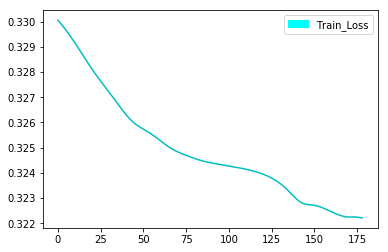

-- Epoch 179/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32219791412353516 --


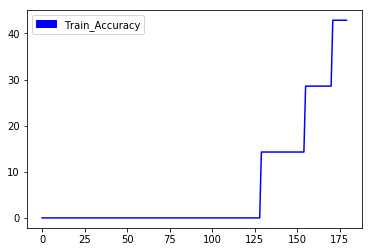

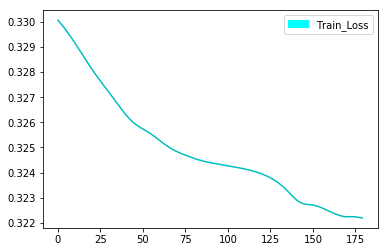

-- Epoch 180/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32218772172927856 --


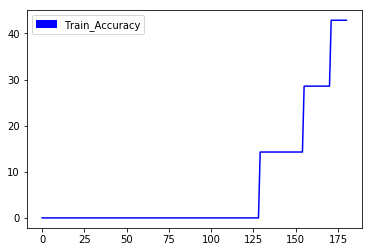

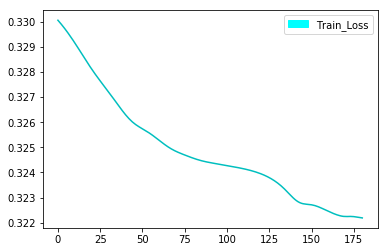

-- Epoch 181/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32217833399772644 --


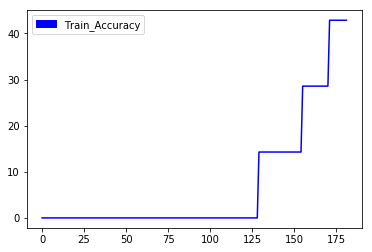

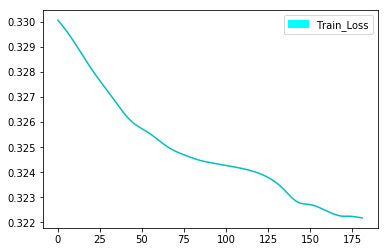

-- Epoch 182/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32216978073120117 --


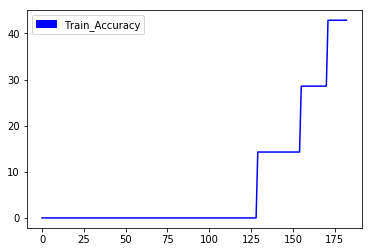

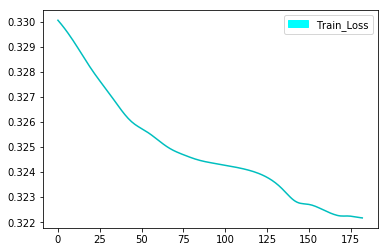

-- Epoch 183/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32216182351112366 --


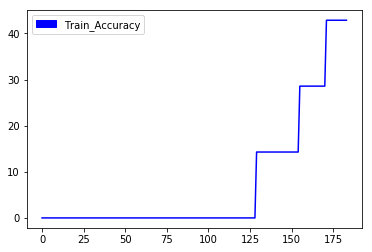

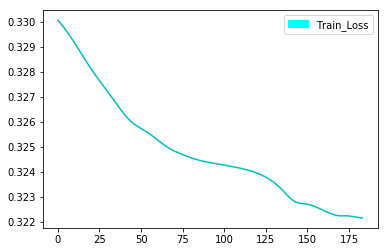

-- Epoch 184/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32215416431427 --


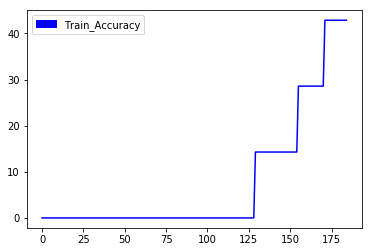

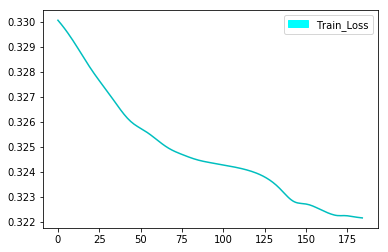

-- Epoch 185/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3221465051174164 --


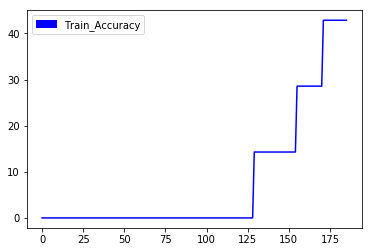

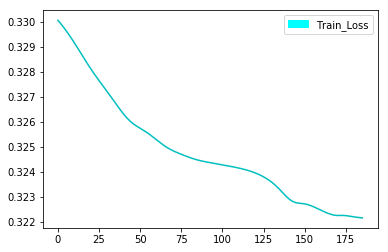

-- Epoch 186/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32213860750198364 --


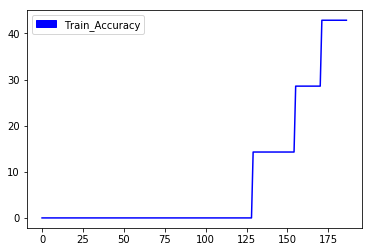

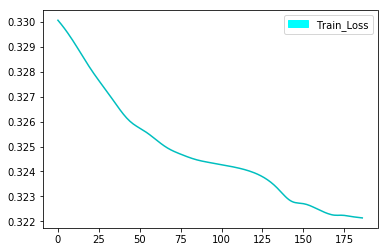

-- Epoch 187/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3221302330493927 --


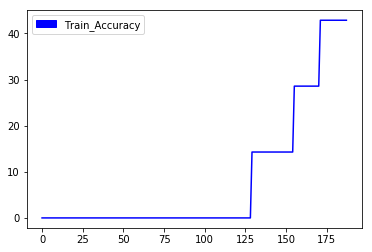

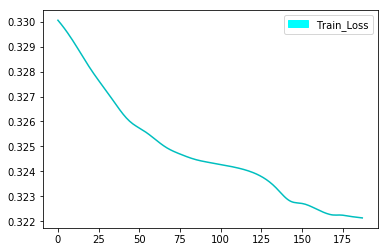

-- Epoch 188/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32212141156196594 --


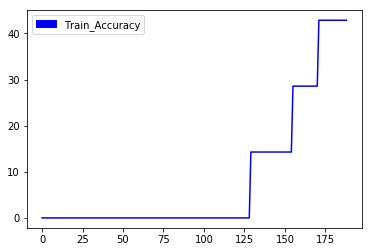

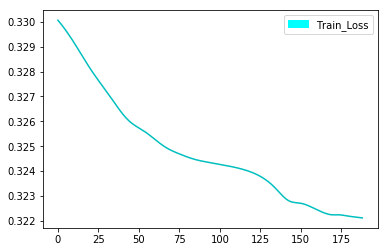

-- Epoch 189/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32211199402809143 --


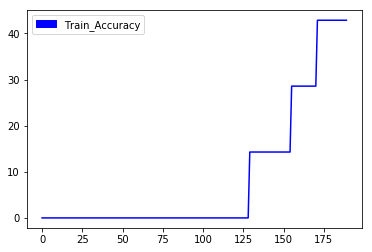

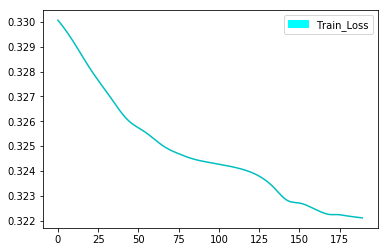

-- Epoch 190/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3221019506454468 --


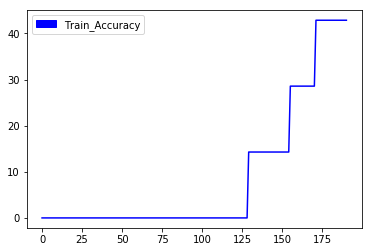

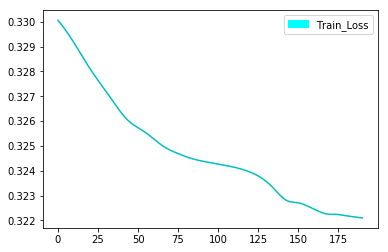

-- Epoch 191/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32209134101867676 --


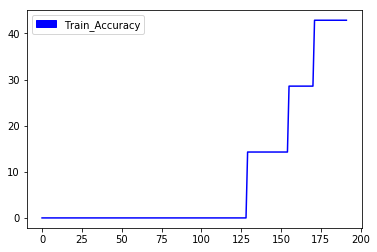

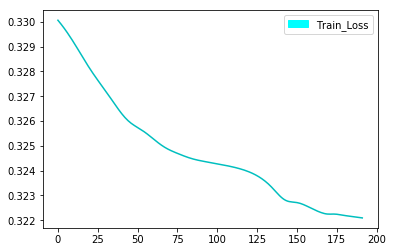

-- Epoch 192/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3220803141593933 --


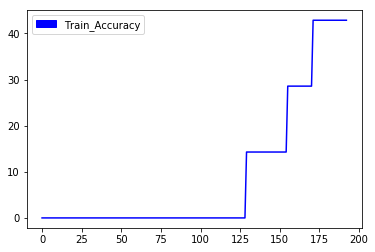

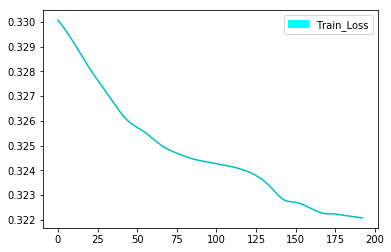

-- Epoch 193/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3220687508583069 --


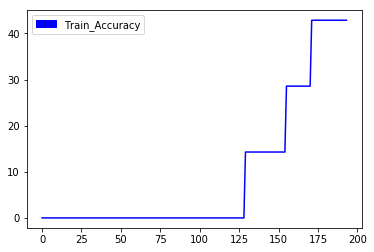

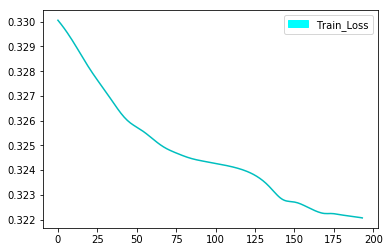

-- Epoch 194/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32205700874328613 --


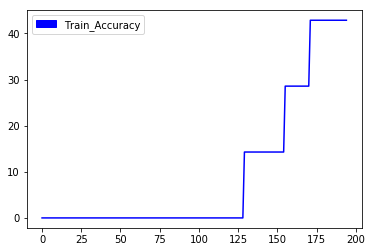

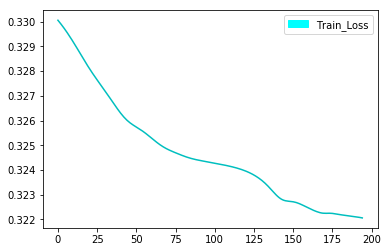

-- Epoch 195/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32204481959342957 --


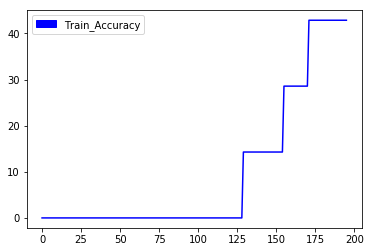

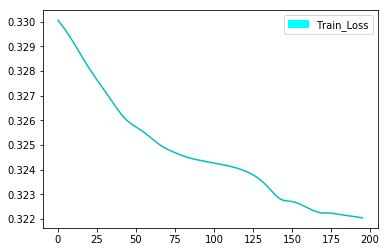

-- Epoch 196/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32203248143196106 --


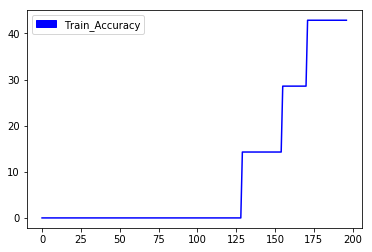

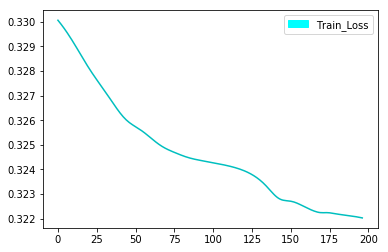

-- Epoch 197/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.3220200836658478 --


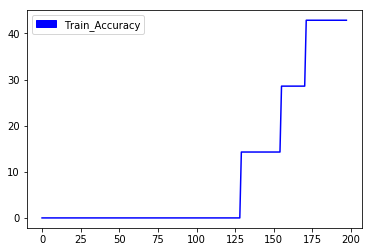

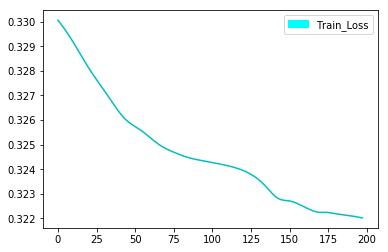

-- Epoch 198/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32200753688812256 --


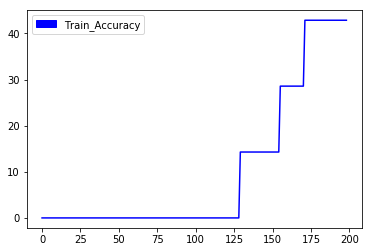

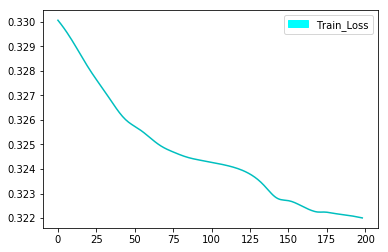

-- Epoch 199/4 --
-- Accuracy 42.857142857142854 --
-- correct 3
-- incorrect 4
-- train loss 0.32199496030807495 --


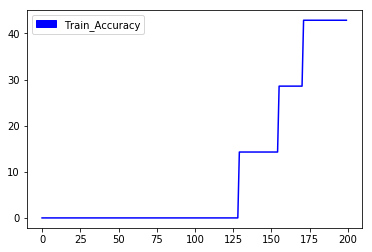

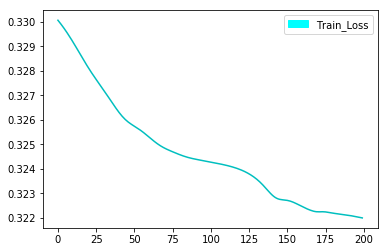

In [0]:
#train

EPOCH = 200
LR = 0.00003 #0.00005
model = BoWClassifier(len(word_index_O),8)
#model_K = BoWClassifier(8,8)
criterion = torch.nn.MultiLabelSoftMarginLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=LR)
show_loss = []
accuracy = []

print('-- START TRAINING ! --')

for step in range(EPOCH):
    model.zero_grad()
    model_K.zero_grad()
    output = model(train_X_O)
    #output = output.detach().numpy()
    loss = criterion(output,train_y)
    show_loss.append(loss.data)
    a, index = torch.max(output.data,0)
    label=train_y.type(torch.LongTensor)

    correct = 0.0
    incorrect = 0.0
    for i in range(7):
      if label[i]==index[i]:
        correct+=1
      else:
        incorrect+=1
      
    accuracy.append((correct/(correct+incorrect))*100)    
    
    #if step%4 == 0:
    print('-- Epoch {}/200 --'.format(step))
    print('-- Accuracy {} --'.format((correct/(correct+incorrect))*100))
    print('-- correct {}'.format(int(correct)))
    print('-- incorrect {}'.format(int(incorrect)))
    print('-- train loss {} --'.format(loss.data))
    plt.plot(range(len(accuracy)),accuracy,'b')
    blue_patch = mpatches.Patch(color='blue', label='Train_Accuracy')
    plt.legend(handles=[blue_patch])
    plt.show()
    plt.plot(range(len(show_loss)),show_loss,'c')
    cyan_patch = mpatches.Patch(color='cyan', label='Train_Loss')
    plt.legend(handles=[cyan_patch])
    plt.show()
      
    loss.backward()
    optimizer.step()

In [0]:
output

tensor([[1.9648e-01, 1.9305e-01, 2.0016e-01, 6.9985e-04, 2.1667e-01, 1.1300e-07,
         6.9121e-05, 1.9287e-01],
        [1.2705e-01, 1.1933e-01, 1.2031e-01, 1.2445e-01, 1.3182e-01, 1.2764e-01,
         1.3060e-01, 1.1882e-01],
        [3.3771e-01, 3.3707e-01, 4.1113e-08, 7.6702e-04, 1.2478e-06, 1.3293e-04,
         3.2432e-01, 9.2194e-07],
        [2.1386e-01, 2.0520e-01, 8.6728e-05, 1.9080e-01, 6.1088e-02, 7.7112e-04,
         1.1766e-01, 2.1053e-01],
        [3.8069e-02, 1.7383e-01, 2.2757e-01, 6.0463e-03, 1.1261e-02, 3.3032e-02,
         2.5416e-01, 2.5603e-01],
        [3.5237e-02, 4.6560e-01, 1.2357e-02, 2.8600e-08, 1.8375e-04, 4.7429e-01,
         1.2745e-05, 1.2316e-02],
        [3.4028e-01, 3.2878e-01, 2.2285e-09, 3.2747e-09, 1.1632e-07, 2.2651e-04,
         3.3071e-01, 3.6007e-08],
        [1.9553e-01, 1.7419e-01, 7.9517e-02, 4.3070e-02, 1.0812e-01, 1.0482e-01,
         1.4784e-01, 1.4691e-01]], grad_fn=<SoftmaxBackward>)

seqs_token 6
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0.

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


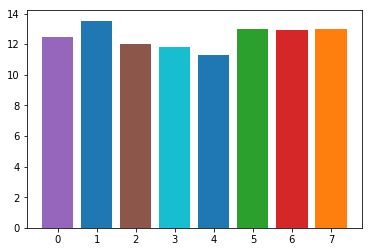

안구건조증,녹내장,백내장,결막염,다래끼,당뇨 망막병증,황반변성,노안




In [0]:
#test 

test_data =['검은 반점이 보여요']

result = {0:'안구건조증',1:'녹내장',2:'백내장',3:'결막염',4:'다래끼',5:'당뇨 망막병증',6:'황반변성',7:'노안'}

graph_x = []
graph_y = []

with torch.no_grad():  
  for test in test_data:
      X = Variable(make_BoW_count(test,word_index_O,maxx)).view(1,-1)
      print(X)

      pred = model(X)
      need_value = pred.numpy()
      order_in = np.argsort(need_value[0])[::-1]
      for i in order_in:
        print(result[i],':',np.around(need_value[0][i]*100,2),'%')
        graph_x.append(i)
        graph_y.append(np.around(need_value[0][i]*100,2))
                       
      plt.bar(graph_x,graph_y,color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan'])
      plt.show()
      print("안구건조증,녹내장,백내장,결막염,다래끼,당뇨 망막병증,황반변성,노안")
      #print("Truth : %s" % tes)
      print("\n") 